In [1]:
library("dndscv")
library(dplyr)
library("biomaRt")
library(MASS) 
library(ggplot2)
library(lmtest)
library(stringr)
library(VennDiagram)
library(readr)
library(gridExtra)
library(RColorBrewer)
library(glue)
library(tidyr)

Warning message:
“replacing previous import ‘Biostrings::translate’ by ‘seqinr::translate’ when loading ‘dndscv’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:biomaRt’:

    select


The following object is masked from ‘package:dplyr’:

    select


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# STAU mutation

In [2]:
STAD_mutation = read_tsv("/Users/shuhaoxu/Desktop/BNFO285/Groupproject/Project2/TCGA.STAD.mutations.txt", quote="\"")

Rows: 234941 Columns: 53
── Column specification ───────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): patient_id, Hugo_Symbol, Center, NCBI_Build, Chromosome, Strand, V...
dbl  (9): Entrez_Gene_Id, Start_Position, End_Position, t_depth, t_ref_count...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
nrow(STAD_mutation)

[1] 234941

# make oncoDriveFML input

In [4]:
oncoDriveFML <- STAD_mutation[STAD_mutation$VARIANT_CLASS == "SNV",]

In [5]:
colnames(oncoDriveFML)

[1] "patient_id"                  "Hugo_Symbol"                
 [3] "Entrez_Gene_Id"              "Center"                     
 [5] "NCBI_Build"                  "Chromosome"                 
 [7] "Start_Position"              "End_Position"               
 [9] "Strand"                      "Variant_Classification"     
[11] "Variant_Type"                "Reference_Allele"           
[13] "Tumor_Seq_Allele1"           "Tumor_Seq_Allele2"          
[15] "dbSNP_RS"                    "dbSNP_Val_Status"           
[17] "Tumor_Sample_Barcode"        "Matched_Norm_Sample_Barcode"
[19] "Match_Norm_Seq_Allele1"      "Tumor_Validation_Allele1"   
[21] "Tumor_Validation_Allele2"    "HGVSc"                      
[23] "HGVSp"                       "Transcript_ID"              
[25] "t_depth"                     "t_ref_count"                
[27] "t_alt_count"                 "n_depth"                    
[29] "Allele"                      "Consequence"                
[31] "cDNA_position"               "CDS_position"               
[33] "Protein_position"            "Amino_acids"                
[35] "Codons"                      "Existing_variation"         
[37] "STRAND"                      "CANONICAL"                  
[39] "CCDS"                        "ENSP"                       
[41] "SWISSPROT"                   "TREMBL"                     
[43] "UNIPARC"                     "SIFT"                       
[45] "PolyPhen"                    "DOMAINS"                    
[47] "IMPACT"                      "VARIANT_CLASS"              
[49] "FILTER"                      "COSMIC"                     
[51] "CALLERS"                     "CONTEXT"                    
[53] "NCALLERS"

In [6]:
oncoDrive_input = oncoDriveFML[, c("Chromosome", "Start_Position", "Reference_Allele", "Tumor_Seq_Allele2", "patient_id")]

In [7]:
colnames(oncoDrive_input) <- c("CHROMOSOME", "POSITION", "REF", "ALT", "SAMPLE")

In [8]:
# write.table(oncoDrive_input, file='oncoDriveFML.tsv', sep='\t', quote=FALSE, row.names=FALSE)

# Make CBASE Input

In [9]:
seqs <- c(
  "AAAAA", "AAAAC", "AAAAG", "AAAAT", "AAACA", "AAACC", "AAACG", "AAACT",
  "AAAGA", "AAAGC", "AAAGG", "AAAGT", "AAATA", "AAATC", "AAATG", "AAATT",
  "AACAA", "AACAC", "AACAG", "AACAT", "AACCA", "AACCC", "AACCG", "AACCT",
  "AACGA", "AACGC", "AACGG", "AACGT", "AACTA", "AACTC", "AACTG", "AACTT",
  "AAGAA", "AAGAC", "AAGAG", "AAGAT", "AAGCA", "AAGCC", "AAGCG", "AAGCT",
  "AAGGA", "AAGGC", "AAGGG", "AAGGT", "AAGTA", "AAGTC", "AAGTG", "AAGTT",
  "AATAA", "AATAC", "AATAG", "AATAT", "AATCA", "AATCC", "AATCG", "AATCT",
  "AATGA", "AATGC", "AATGG", "AATGT", "AATTA", "AATTC", "AATTG", "AATTT"
)

keys <- substr(seqs, 3, 5)
values <- 0:(length(seqs) - 1)
context_dict <- setNames(values, keys)

In [10]:
context_dict

AAA AAC AAG AAT ACA ACC ACG ACT AGA AGC AGG AGT ATA ATC ATG ATT CAA CAC CAG CAT 
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
CCA CCC CCG CCT CGA CGC CGG CGT CTA CTC CTG CTT GAA GAC GAG GAT GCA GCC GCG GCT 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
GGA GGC GGG GGT GTA GTC GTG GTT TAA TAC TAG TAT TCA TCC TCG TCT TGA TGC TGG TGT 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
TTA TTC TTG TTT 
 60  61  62  63

In [11]:
cbase_input = STAD_mutation %>% filter(VARIANT_CLASS == "SNV")
cbase_input = cbase_input %>% dplyr::select(c(patient_id, Hugo_Symbol, Chromosome,
                                       Start_Position, Reference_Allele, Tumor_Seq_Allele2,
                                       Variant_Classification, CONTEXT))
cbase_input <- cbase_input %>%
  mutate(
    context = substr(CONTEXT, 2, 4),
    # context = substr(CONTEXT, (nchar(CONTEXT) - 4) %/% 2 + 1, (nchar(CONTEXT) - 4) %/% 2 + 5),
    index = context_dict[context]
  )

cbase_input = cbase_input %>% filter(Variant_Classification != "3'Flank") %>% filter(Variant_Classification != "5'Flank")
cbase_input <- cbase_input %>%
  mutate(annotate = case_when(
    Variant_Classification == "Missense_Mutation" ~ "missense",
    Variant_Classification == "Nonsense_Mutation" ~ "nonsense",
    Variant_Classification == "Silent" ~ "coding-synon",
    Variant_Classification == "3'UTR" ~ "utr-3",
    Variant_Classification == "5'UTR" ~ "utr-5"
  ))

cbase_input = cbase_input %>% dplyr::select(c(Hugo_Symbol, annotate, Tumor_Seq_Allele2, context))
colnames(cbase_input) <- c("Gene", "mut_eff", "mut_nuc", "context")
# write.table(cbase_input, file='cbase_input.tsv', sep='\t', quote=FALSE, row.names=FALSE)

## Filter out patients with too many mutations and genes with too many mutations

In [12]:
patient_mut = 7000
gene_mut = 300

In [13]:
sample_mutation_counts <- table(STAD_mutation$patient_id)
gene_mutation_counts <- table(STAD_mutation$Hugo_Symbol)

# Filter hypermutated patients
print(nrow(STAD_mutation))
print(length(sample_mutation_counts))
hypermutators_patient <- names((sample_mutation_counts[(sample_mutation_counts > patient_mut) | (sample_mutation_counts <= 10)]))
print(length(hypermutators_patient))
STAD_mutation_filtered_patient <- STAD_mutation %>% filter(!patient_id %in% hypermutators_patient)
print(nrow(STAD_mutation_filtered_patient))

sample_mutation_counts_filtered_patient <- table(STAD_mutation_filtered_patient$patient_id)
gene_mutation_counts_filtered_patient <- table(STAD_mutation_filtered_patient$Hugo_Symbol)

# Filter out hyptermutated genes
gene_mutation_counts <- table(STAD_mutation$Hugo_Symbol)
print(length(gene_mutation_counts))
hypermutators_gene <- names((gene_mutation_counts[(gene_mutation_counts > gene_mut)]))
print(length(hypermutators_gene))
STAD_mutation_filtered_patient_gene <- STAD_mutation_filtered_patient %>% filter(!Hugo_Symbol %in% hypermutators_gene)
print(nrow(STAD_mutation_filtered_patient_gene))

sample_mutation_counts_filtered_patient_gene <- table(STAD_mutation_filtered_patient_gene$patient_id)
gene_mutation_counts_filtered_patient_gene <- table(STAD_mutation_filtered_patient_gene$Hugo_Symbol)

# Function to compute summary statistics for mutation counts
summarize_mutation_counts <- function(counts, label) {
  stats <- data.frame(
    Mean = mean(counts),
    Median = median(counts),
    Variance = var(counts),
    Max = max(counts),
    Dispersion = var(counts) / mean(counts),
    CV = sd(counts) / mean(counts)
  )
}

stats_before <- summarize_mutation_counts(sample_mutation_counts, "Patients (Before Filtering)")
stats_after_patient <- summarize_mutation_counts(sample_mutation_counts_filtered_patient, "Patients (After Patient Filtering)")
stats_after_both <- summarize_mutation_counts(sample_mutation_counts_filtered_patient_gene, "Patients (After Patient and Gene Filtering)")

stats_gene_before <- summarize_mutation_counts(gene_mutation_counts, "Genes (Before Filtering)")
stats_gene_after_patient <- summarize_mutation_counts(gene_mutation_counts_filtered_patient, "Genes (After Patient Filtering)")
stats_gene_after_both <- summarize_mutation_counts(gene_mutation_counts_filtered_patient_gene, "Genes (After Patient and Gene Filtering)")

[1] 234941
[1] 415
[1] 9
[1] 203393
[1] 18933
[1] 2
[1] 202264


## Filter for mutations that pass

In [14]:
STAD_mutation_filtered_pass <- STAD_mutation_filtered_patient_gene %>% filter(FILTER == "PASS")
nrow(STAD_mutation_filtered_pass)

[1] 181529

### keep only SNV

In [15]:
# STAD_mutation_filtered_pass <- STAD_mutation_filtered_pass[STAD_mutation_filtered_pass$Variant_Type == "SNP",]
STAD_mutation_filtered_pass <- STAD_mutation_filtered_pass[STAD_mutation_filtered_pass$VARIANT_CLASS == "SNV",]
nrow(STAD_mutation_filtered_pass)



[1] 157661

In [16]:
sample_mutation_counts_filtered_final <- table(STAD_mutation_filtered_pass$patient_id)
gene_mutation_counts_filtered_final <- table(STAD_mutation_filtered_pass$Hugo_Symbol)

In [17]:
plot_data_patient <- data.frame(
  Counts = c(sample_mutation_counts, sample_mutation_counts_filtered_patient, sample_mutation_counts_filtered_patient_gene, sample_mutation_counts_filtered_final),
  Stage = factor(
    rep(c("Before Filtering", "After Patient Filtering", "After Patient and Gene Filtering", "After SNP Filtering"),
        times = c(length(sample_mutation_counts), length(sample_mutation_counts_filtered_patient), length(sample_mutation_counts_filtered_patient_gene), length(sample_mutation_counts_filtered_final))),
    levels = c("Before Filtering", "After Patient Filtering", "After Patient and Gene Filtering", "After SNP Filtering")
  )
)

plot_data_gene <- data.frame(
  Counts = c(gene_mutation_counts, gene_mutation_counts_filtered_patient, gene_mutation_counts_filtered_patient_gene, gene_mutation_counts_filtered_final),
  Stage = factor(
    rep(c("Before Filtering", "After Patient Filtering", "After Patient and Gene Filtering", "After SNP Filtering"),
        times = c(length(gene_mutation_counts), length(gene_mutation_counts_filtered_patient), length(gene_mutation_counts_filtered_patient_gene), length(gene_mutation_counts_filtered_final))),
    levels = c("Before Filtering", "After Patient Filtering", "After Patient and Gene Filtering", "After SNP Filtering")
  )
)

colors <- brewer.pal(4, "Set2")

# Histogram for mutation counts per patient
p1 <- ggplot(plot_data_patient, aes(x = Counts, fill = Stage)) +
  geom_histogram(binwidth = 0.1, alpha = 0.7) +
  facet_wrap(~ Stage, ncol = 1, scales = "free_y") +
  scale_x_log10(breaks = c(1, 10, 100, 1000, 10000), labels = scales::comma) +
  scale_fill_manual(values = colors) +
  labs(
    title = "Mutation Counts per Patient",
    subtitle = glue("Filtering out: Patients > {patient_mut} mutations, Genes > {gene_mut} mutations"),
    x = "Mutation Count (log scale)",
    y = "Frequency"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none", 
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 10),
    panel.grid.minor = element_blank(),
    strip.text = element_text(size = 10, face = "bold")
  )

# Histogram for mutation counts per gene 
p2 <- ggplot(plot_data_gene, aes(x = Counts, fill = Stage)) +
  geom_histogram(binwidth = 0.1, alpha = 0.7) +
  facet_wrap(~ Stage, ncol = 1, scales = "free_y") +
  scale_x_log10(breaks = c(1, 10, 100, 1000, 10000), labels = scales::comma) +
  scale_fill_manual(values = colors) +
  labs(
    title = "Mutation Counts per Gene",
    subtitle = glue("Filtering out: Patients > {patient_mut} mutations, Genes > {gene_mut} mutations"),
    x = "Mutation Count (log scale)",
    y = "Frequency"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 10),
    panel.grid.minor = element_blank(),
    strip.text = element_text(size = 10, face = "bold")
  )

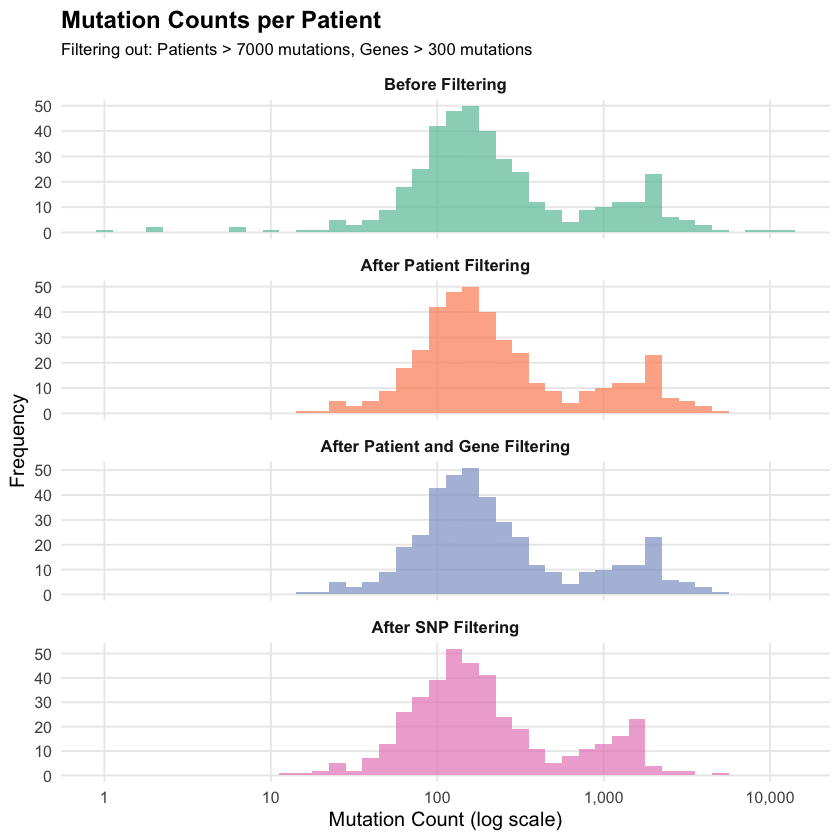

In [18]:
p1

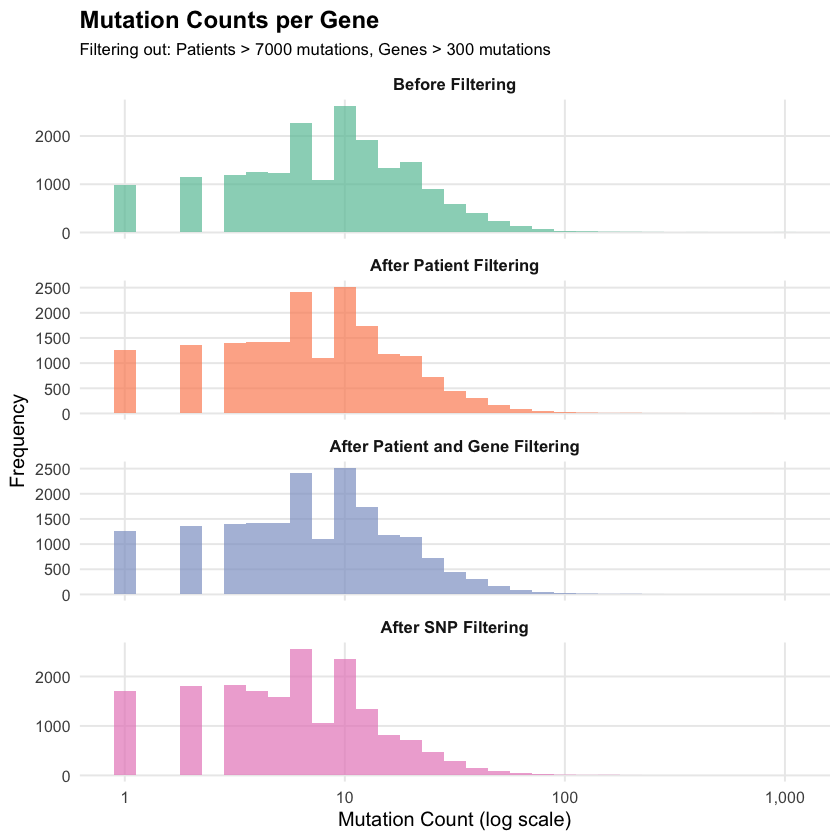

In [19]:
p2

# Mutated samples per gene

In [20]:
mutation_summary <- STAD_mutation %>%
  group_by(Hugo_Symbol) %>%
  summarise(Samples_Mutated = n_distinct(patient_id)) %>%
  ungroup() %>%
  arrange(desc(Samples_Mutated)) %>%  
  mutate(Hugo_Symbol = factor(Hugo_Symbol, levels = Hugo_Symbol)) 

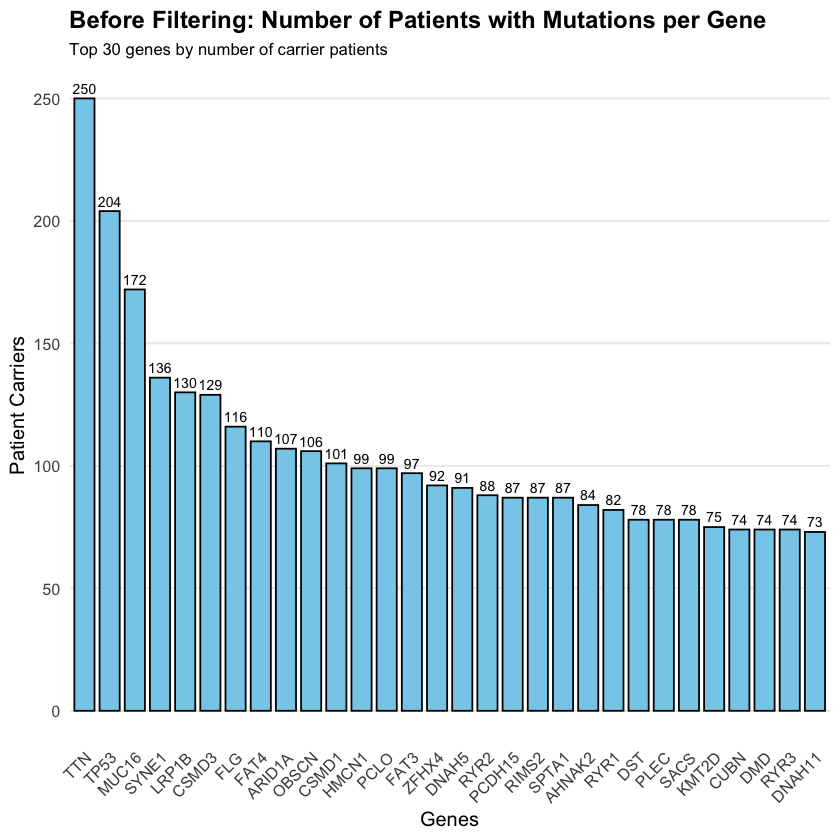

In [21]:
mutation_summary <- STAD_mutation %>%
  group_by(Hugo_Symbol) %>%
  summarise(Samples_Mutated = n_distinct(patient_id)) %>%
  ungroup() %>%
  arrange(desc(Samples_Mutated)) %>%  
  slice_head(n = 30) %>%
  mutate(Hugo_Symbol = factor(Hugo_Symbol, levels = Hugo_Symbol)) 

p <- ggplot(mutation_summary, aes(x = Hugo_Symbol, y = Samples_Mutated)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.8) +
  geom_text(aes(label = Samples_Mutated), vjust = -0.5, size = 3) +
  labs(
    title = "Before Filtering: Number of Patients with Mutations per Gene",
    subtitle = "Top 30 genes by number of carrier patients",
    x = "Genes",
    y = "Patient Carriers"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 10),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major.x = element_blank(), 
    panel.grid.minor = element_blank()
  )

print(p)

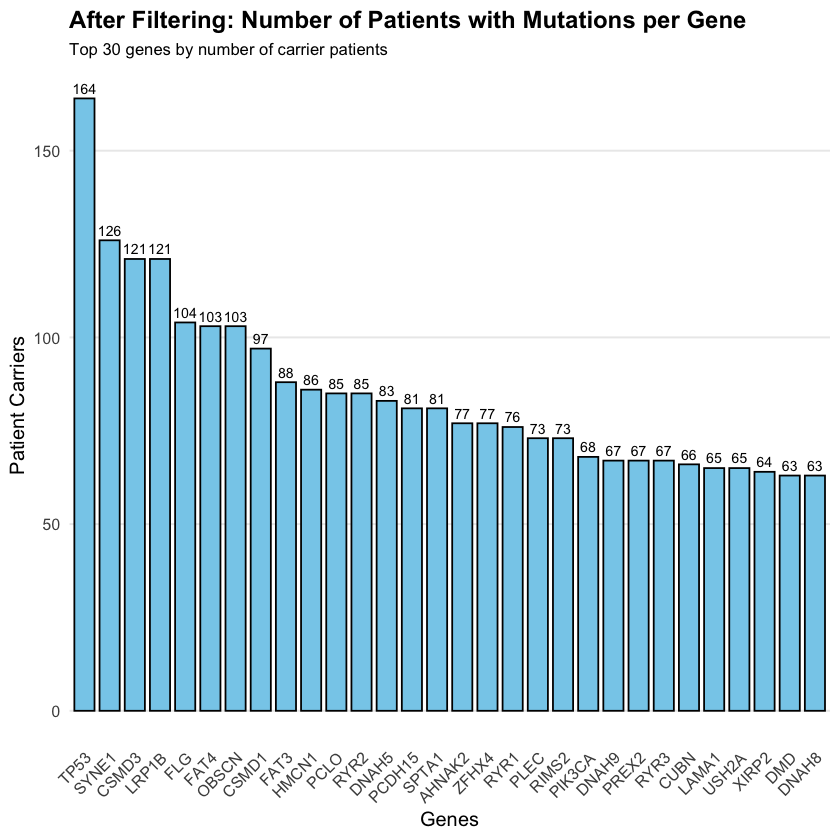

In [22]:
mutation_summary <- STAD_mutation_filtered_pass %>%
  group_by(Hugo_Symbol) %>%
  summarise(Samples_Mutated = n_distinct(patient_id)) %>%
  ungroup() %>%
  arrange(desc(Samples_Mutated)) %>% 
  slice_head(n = 30) %>%
  mutate(Hugo_Symbol = factor(Hugo_Symbol, levels = Hugo_Symbol))

p <- ggplot(mutation_summary, aes(x = Hugo_Symbol, y = Samples_Mutated)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.8) +
  geom_text(aes(label = Samples_Mutated), vjust = -0.5, size = 3) +
  labs(
    title = "After Filtering: Number of Patients with Mutations per Gene",
    subtitle = "Top 30 genes by number of carrier patients",
    x = "Genes",
    y = "Patient Carriers"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 10),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major.x = element_blank(), 
    panel.grid.minor = element_blank()
  )

print(p)

# Variant callers

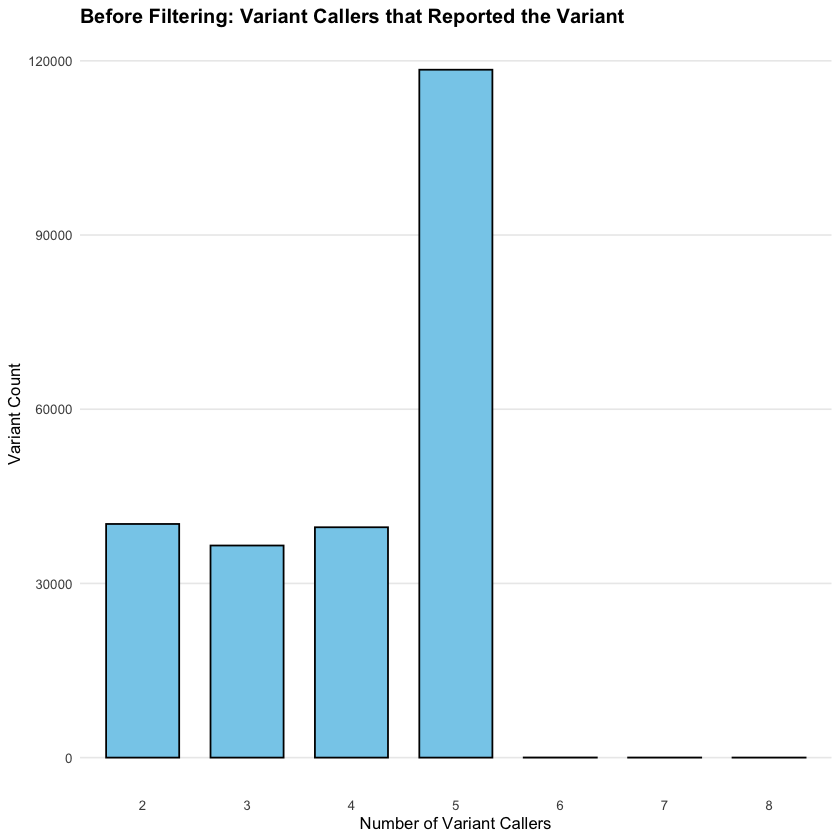

In [23]:
callers <- STAD_mutation %>%
  group_by(NCALLERS) %>%
  summarise(Variant_Count = n()) %>%
  ungroup() %>%
  mutate(NCALLERS = factor(NCALLERS)) 

p <- ggplot(callers, aes(x = NCALLERS, y = Variant_Count)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.7) +
  labs(
    title = "Before Filtering: Variant Callers that Reported the Variant",
    x = "Number of Variant Callers",
    y = "Variant Count"
  ) +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(size = 12, face = "bold"),
    axis.title.x = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    panel.grid.major.x = element_blank(),  # Remove x-axis grid lines
    panel.grid.minor = element_blank()
  )

p

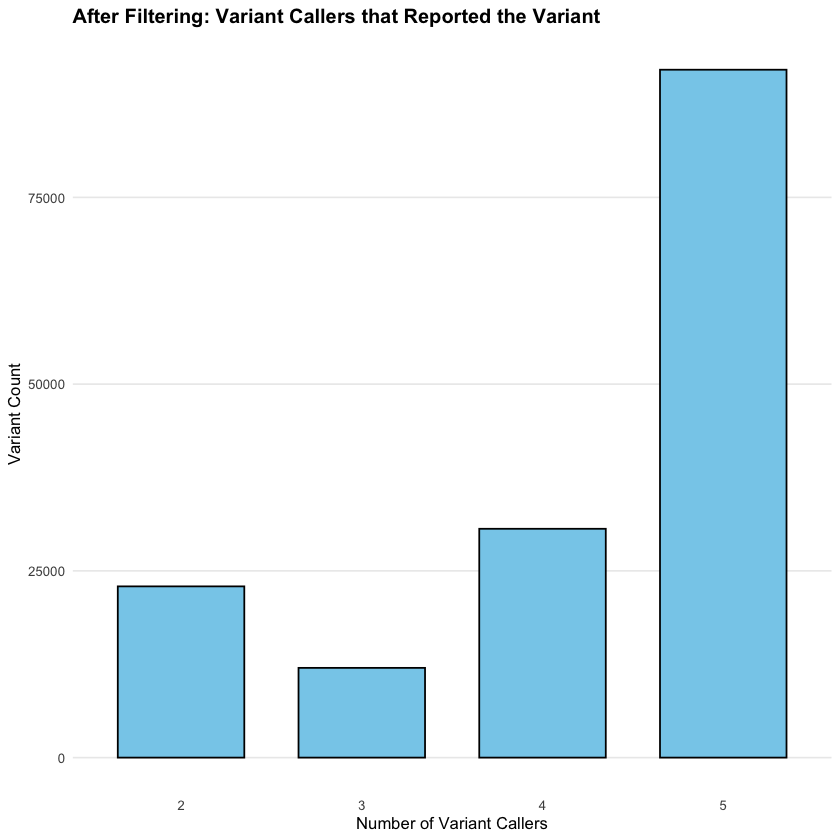

In [24]:
callers <- STAD_mutation_filtered_pass %>%
  group_by(NCALLERS) %>%
  summarise(Variant_Count = n()) %>%
  ungroup() %>%
  mutate(NCALLERS = factor(NCALLERS)) 

p <- ggplot(callers, aes(x = NCALLERS, y = Variant_Count)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.7) +
  labs(
    title = "After Filtering: Variant Callers that Reported the Variant",
    x = "Number of Variant Callers",
    y = "Variant Count"
  ) +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(size = 12, face = "bold"),
    axis.title.x = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    panel.grid.major.x = element_blank(),  # Remove x-axis grid lines
    panel.grid.minor = element_blank()
  )

p

## Annotate the mutations with gene name using the transcript id

In [25]:
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
transcript_ids <- unique(STAD_mutation_filtered_pass$Transcript_ID)

transcript_data <- getBM(attributes = c("ensembl_transcript_id", "hgnc_symbol", "transcript_length"),
                         filters = "ensembl_transcript_id",
                         values = transcript_ids,
                         mart = ensembl)

gene_lengths <- transcript_data %>%
  group_by(hgnc_symbol) %>%
  summarise(gene_length = max(transcript_length, na.rm = TRUE)) %>%
  ungroup()


# 1. Start Aggregate mutations and annotate with gene lengths

In [26]:
mutation_counts <- STAD_mutation_filtered_pass %>% 
  group_by(Hugo_Symbol) %>% 
  summarise(observed_mutations = n()) %>% 
  ungroup()

mutation_counts_with_GeneLength <- mutation_counts %>%
  left_join(gene_lengths, by = c("Hugo_Symbol" = "hgnc_symbol"))

mutation_counts_filtered <- mutation_counts_with_GeneLength %>%
  filter(!is.na(gene_length))

mutation_counts_filtered$log_gene_length <- log(mutation_counts_filtered$gene_length + 1e-6)

# 2. Calculate expected mutation using global mutate rate per bp

In [27]:
total_mutations <- sum(mutation_counts_filtered$observed_mutations)
total_length <- sum(mutation_counts_filtered$gene_length)
avg_mutation_rate <- total_mutations / total_length
cat("Average mutation rate (mutations per bp):", avg_mutation_rate, "\n")

mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(expected_mutations = gene_length * avg_mutation_rate)

Average mutation rate (mutations per bp): 0.002399827 


# Observed mutation distribution and expected mutation

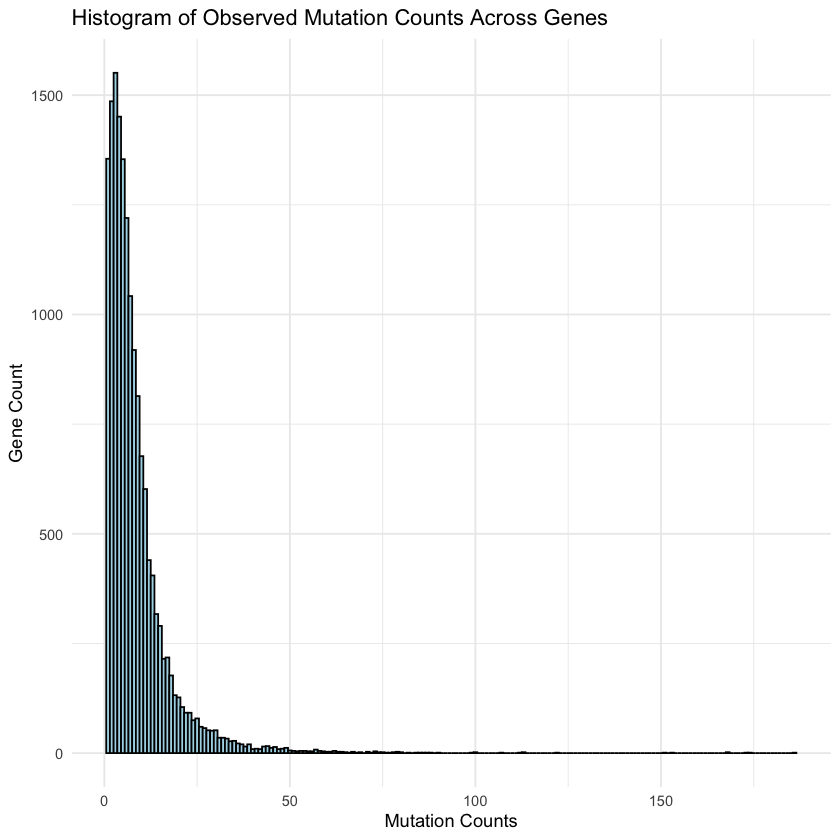

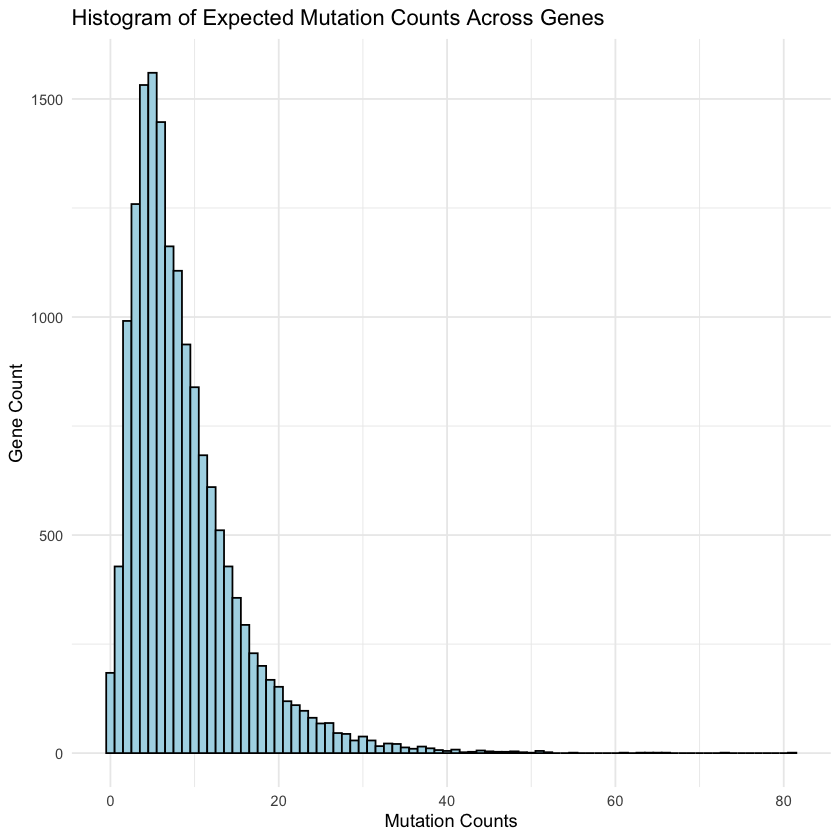

In [28]:
ggplot(mutation_counts_filtered, aes(x = observed_mutations)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  labs(x = "Mutation Counts", y = "Gene Count", 
       title = "Histogram of Observed Mutation Counts Across Genes") +
  theme_minimal()

ggplot(mutation_counts_filtered, aes(x = expected_mutations)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  labs(x = "Mutation Counts", y = "Gene Count", 
       title = "Histogram of Expected Mutation Counts Across Genes") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  mutation_counts_filtered$gene_length and mutation_counts_filtered$observed_mutations
t = 79.916, df = 15975, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5232504 0.5454071
sample estimates:
      cor 
0.5344205 



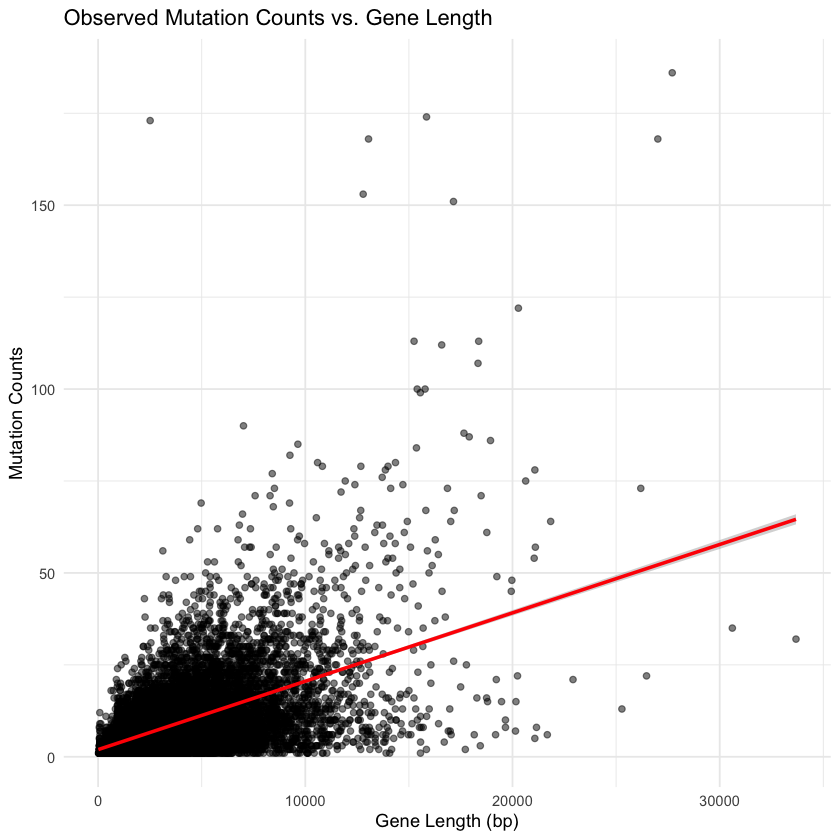

In [29]:
# Scatter Plot
ggplot(mutation_counts_filtered, aes(x = gene_length, y = observed_mutations)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "red") +
  labs(x = "Gene Length (bp)", y = "Mutation Counts", 
       title = "Observed Mutation Counts vs. Gene Length") +
  theme_minimal()

# Correlation Test
cor_test <- cor.test(mutation_counts_filtered$gene_length, mutation_counts_filtered$observed_mutations, method = "pearson")
print(cor_test)

# 3. Annotate average SIFT score and dNdS per gene

In [30]:
STAD_mutation_filtered_pass <- STAD_mutation_filtered_pass %>%
mutate(
  SIFT_numeric = as.numeric(str_extract(SIFT, "(?<=\\()\\d*\\.?\\d*(?=\\))")),
  SIFT = ifelse(SIFT == ".", NA, SIFT)
)

In [31]:
impact_scores <- STAD_mutation_filtered_pass %>%
  group_by(Hugo_Symbol) %>%
  summarise(avg_sift = mean(SIFT_numeric, na.rm = TRUE)) %>%
  ungroup()

mutation_counts_filtered <- mutation_counts_filtered %>%
  left_join(impact_scores, by = "Hugo_Symbol")

mutation_counts_filtered$avg_sift <- replace(mutation_counts_filtered$avg_sift, is.na(mutation_counts_filtered$avg_sift), 0)


# Avg non-zero SIFT

`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  mutation_counts_filtered$avg_sift and mutation_counts_filtered$observed_mutations
t = 0.60551, df = 15975, p-value = 0.5448
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01071637  0.02029539
sample estimates:
        cor 
0.004790664 



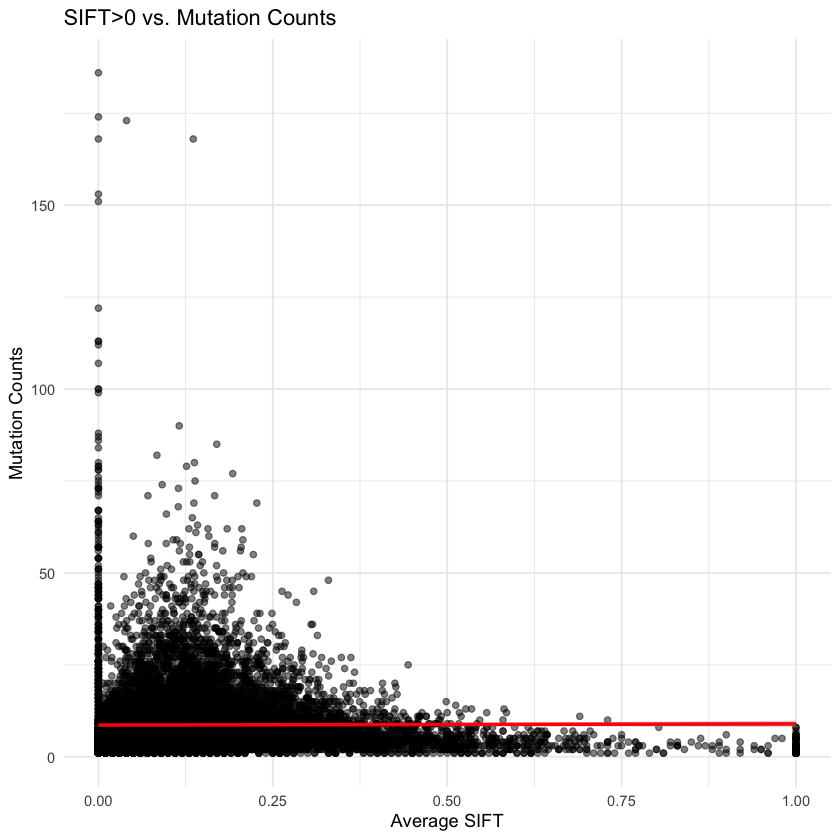

In [32]:
# Scatter Plot
ggplot(mutation_counts_filtered, aes(x = avg_sift, y = observed_mutations)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "red") +
  labs(x = "Average SIFT", y = "Mutation Counts", 
       title = "SIFT>0 vs. Mutation Counts") +
  theme_minimal()

# Correlation Test
cor_test <- cor.test(mutation_counts_filtered$avg_sift, mutation_counts_filtered$observed_mutations, method = "pearson")
print(cor_test)

# Avg SIFT

In [33]:
# impact_scores <- STAD_mutation_filtered_pass %>%
#   group_by(Hugo_Symbol) %>%
#   summarise(avg_sift = mean(SIFT_numeric, na.rm = TRUE)) %>%
#   ungroup()

# mutation_counts_filtered <- mutation_counts_filtered %>%
#   left_join(impact_scores, by = "Hugo_Symbol")

# mutation_counts_filtered$avg_sift <- replace(mutation_counts_filtered$avg_sift, is.na(mutation_counts_filtered$avg_sift), 0)


`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  mutation_counts_filtered$avg_sift and mutation_counts_filtered$observed_mutations
t = 0.60551, df = 15975, p-value = 0.5448
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01071637  0.02029539
sample estimates:
        cor 
0.004790664 



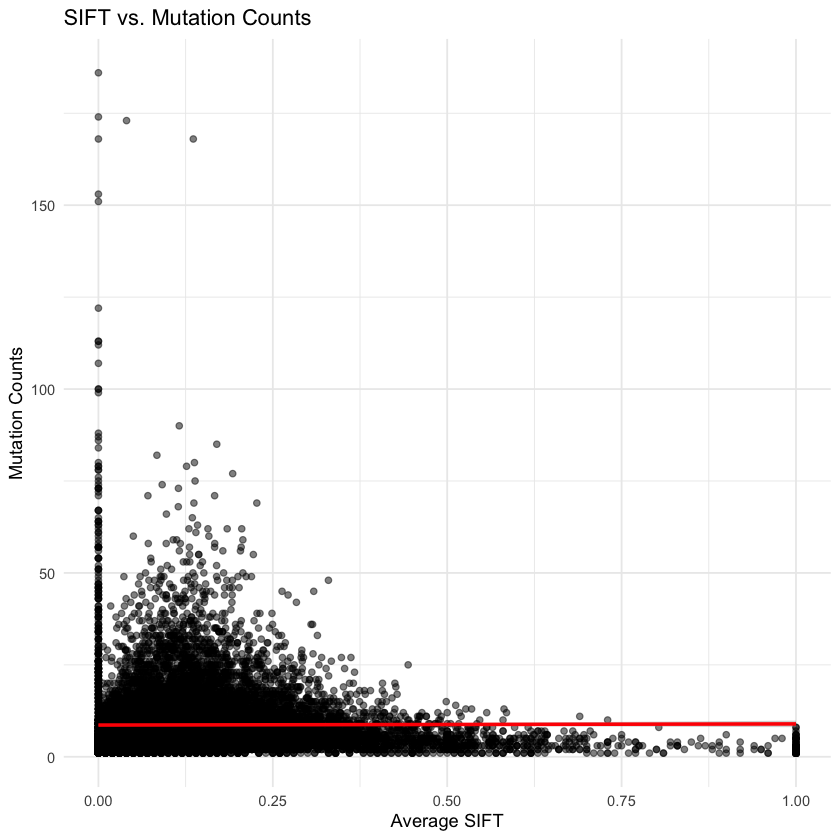

In [34]:
# Scatter Plot
ggplot(mutation_counts_filtered, aes(x = avg_sift, y = observed_mutations)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "red") +
  labs(x = "Average SIFT", y = "Mutation Counts", 
       title = "SIFT vs. Mutation Counts") +
  theme_minimal()

# Correlation Test
cor_test <- cor.test(mutation_counts_filtered$avg_sift, mutation_counts_filtered$observed_mutations, method = "pearson")
print(cor_test)

In [35]:
mutation_types <- STAD_mutation_filtered_pass %>%
  group_by(Hugo_Symbol) %>%
  summarise(
    dN = sum(Variant_Classification %in% c("Missense_Mutation", "Nonsense_Mutation", "Frame_Shift_Del", "Frame_Shift_Ins", "Splice_Site", "Translation_Start_Site")),
    dS = sum(Variant_Classification %in% c("Silent", "5'UTR", "Intron", "3'UTR", "3'Flank", "5'Flank"))
  ) %>%
  ungroup() %>%
  mutate(dN_dS = (dN / (dS + 1e-6)))

mutation_counts_filtered <- mutation_counts_filtered %>%
  left_join(mutation_types[, c("Hugo_Symbol", "dN_dS")], by = "Hugo_Symbol")

In [36]:
mutation_types <- STAD_mutation_filtered_pass %>%
  group_by(Hugo_Symbol) %>%
  summarise(
    dN = sum(Variant_Classification %in% c("Missense_Mutation", "Nonsense_Mutation", "Frame_Shift_Del", "Frame_Shift_Ins", "Splice_Site", "Translation_Start_Site")),
    dS = sum(Variant_Classification %in% c("Silent", "5'UTR", "Intron", "3'UTR", "3'Flank", "5'Flank"))
  ) %>%
  ungroup()

mutation_counts_filtered <- mutation_counts_filtered %>%
  left_join(mutation_types, by = "Hugo_Symbol")

# 4. Expected global syn mutation rate (ignore for now, switch to substitution model weighted expected_syn

In [37]:
# total_syn_mutations <- sum(mutation_counts_filtered$dS)
# total_length <- sum(mutation_counts_filtered$gene_length)
# avg_syn_rate <- total_syn_mutations / total_length

# mutation_counts_filtered <- mutation_counts_filtered %>%
#   mutate(
#     expected_syn = gene_length * avg_syn_rate
#   )
# cat("Average syn mutation rate (mutations per bp):", avg_syn_rate, "\n")

# 5. calculate t

In [38]:
t <- (sum(mutation_counts_filtered$dS) + sum(mutation_counts_filtered$dN)) / total_length
t

[1] 0.002386227

# 6. calculate expected_syn

In [39]:
syn_by_substitution <- STAD_mutation_filtered_pass %>%
  filter(Variant_Classification %in% c("Silent", "5'UTR", "Intron", "3'UTR", "3'Flank", "5'Flank")) %>%
  mutate(substitution = paste(Reference_Allele, Tumor_Seq_Allele2, sep = ">")) %>%
  group_by(Hugo_Symbol, substitution) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = substitution, values_from = count, values_fill = 0, 
              names_prefix = "syn_")

dS_per_gene <- STAD_mutation_filtered_pass %>%
  filter(Variant_Classification %in% c("Silent", "5'UTR", "Intron", "3'UTR", "3'Flank", "5'Flank")) %>%
  group_by(Hugo_Symbol) %>%
  summarise(dS = n(), .groups = "drop")

mutation_counts_filtered <- mutation_counts_filtered %>%
  {if ("dS" %in% colnames(.)) dplyr::select(., -dS) else .} %>%
  left_join(dS_per_gene, by = "Hugo_Symbol") %>%
  left_join(syn_by_substitution, by = "Hugo_Symbol") %>%
  mutate(
    dS = coalesce(dS, 0),
    across(starts_with("syn_"), ~ coalesce(.x, 0))
  )

In [40]:
substitution_counts <- STAD_mutation_filtered_pass %>%
  mutate(substitution = paste(Reference_Allele, Tumor_Seq_Allele2, sep = ">")) %>%
  group_by(substitution) %>%
  summarise(count = n(), .groups = "drop")

total_counts <- sum(substitution_counts$count)

substitution_rates <- substitution_counts %>%
  mutate(rate = count / total_counts)

In [41]:
head(substitution_rates)

substitution,count,rate
<chr>,<int>,<dbl>
A>C,5435,0.03447270
A>G,14275,0.09054237
A>T,2825,0.01791819
C>A,8825,0.05597453
C>G,2920,0.01852075
C>T,44151,0.28003755


In [42]:
syn_long <- mutation_counts_filtered %>%
  dplyr::select(Hugo_Symbol, dplyr::starts_with("syn_")) %>%
  pivot_longer(cols = dplyr::starts_with("syn_"), names_to = "substitution", 
               values_to = "L_i_s", names_prefix = "syn_") %>%
  filter(L_i_s > 0)

syn_long_with_rates <- syn_long %>%
  left_join(substitution_rates %>% dplyr::select(substitution, r_i = rate), 
            by = "substitution")

syn_long_with_rates <- syn_long_with_rates %>%
  mutate(contribution = r_i * L_i_s)

In [43]:
expected_syn_per_gene <- syn_long_with_rates %>%
  group_by(Hugo_Symbol) %>%
  summarise(sum_contribution = sum(contribution), .groups = "drop") %>%
  mutate(expected_syn = t * sum_contribution)

mutation_counts_filtered <- mutation_counts_filtered %>%
  left_join(expected_syn_per_gene %>% dplyr::select(Hugo_Symbol, expected_syn), 
            by = "Hugo_Symbol")

In [44]:
mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(expected_syn = coalesce(expected_syn, 0))

## Apply poisson distribution to calculate expected mutations and run poisson test

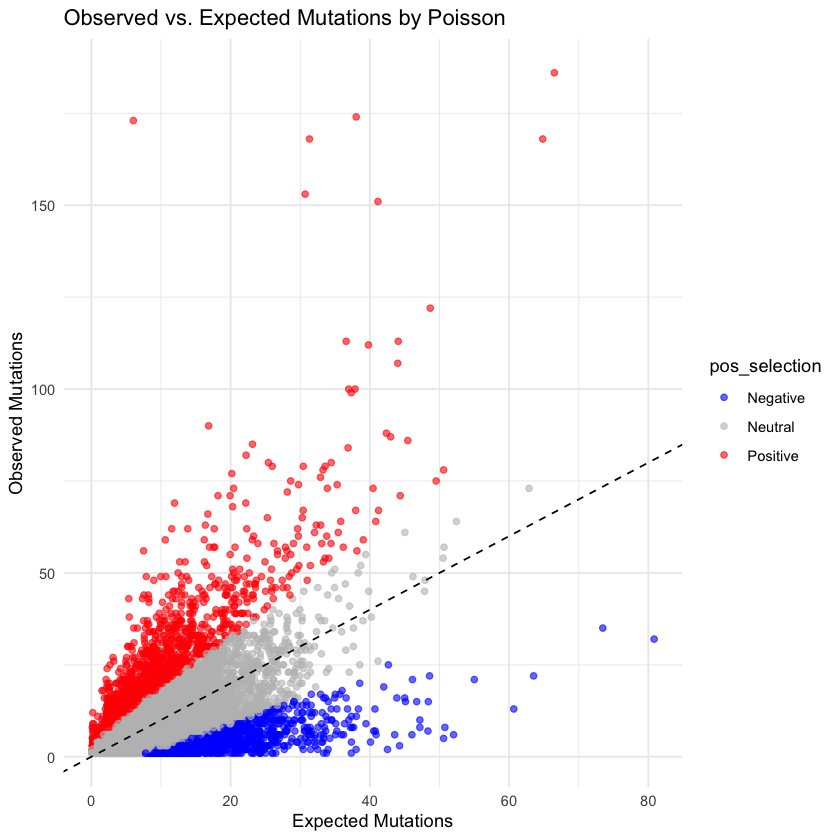

In [45]:
# total_mutations <- nrow(STAD_mutation_filtered_pass)
# total_gene_length <- sum(mutation_counts_filtered$gene_length, na.rm = TRUE)
# mutation_counts_filtered$pos_expected_mutations <- (mutation_counts_filtered$gene_length / total_gene_length) * total_mutations

mutation_counts_filtered$p_value <- mapply(function(obs, exp) {
  poisson.test(obs, r = exp, alternative = "two.sided")$p.value
}, mutation_counts_filtered$observed_mutations, mutation_counts_filtered$expected_mutations)

mutation_counts_filtered$pos_adj_p_value <- p.adjust(mutation_counts_filtered$p_value, method = "BH")
mutation_counts_filtered$pos_selection <- ifelse(mutation_counts_filtered$pos_adj_p_value < 0.05 & mutation_counts_filtered$observed_mutations > mutation_counts_filtered$expected_mutations, "Positive",
                                    ifelse(mutation_counts_filtered$pos_adj_p_value < 0.05 & mutation_counts_filtered$observed_mutations < mutation_counts_filtered$expected_mutations, "Negative", "Neutral"))

ggplot(mutation_counts_filtered, aes(x = expected_mutations, y = observed_mutations, color = pos_selection)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "gray")) +
  labs(x = "Expected Mutations", y = "Observed Mutations",
       title = "Observed vs. Expected Mutations by Poisson") +
  theme_minimal()

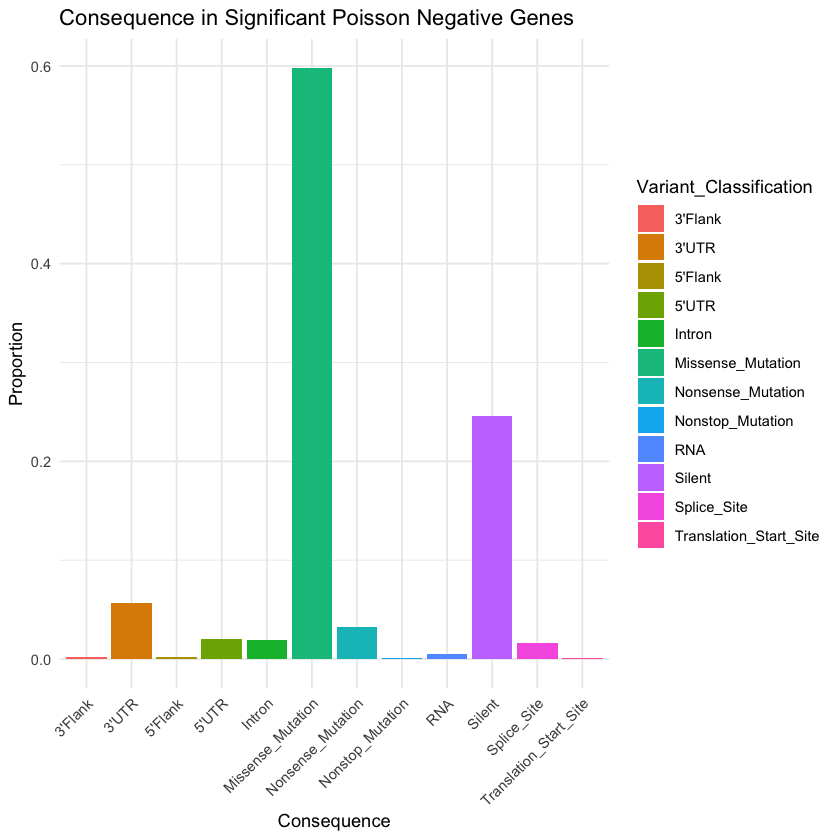

In [46]:
pos_positive_genes <- mutation_counts_filtered %>%
  filter(pos_selection == "Negative" & pos_adj_p_value < 0.05)

significant_genes <- pos_positive_genes$Hugo_Symbol
consequence_summary <- STAD_mutation_filtered_pass %>%
  filter(Hugo_Symbol %in% significant_genes) %>%
  group_by(Hugo_Symbol, Variant_Classification) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Variant_Classification) %>%
  summarise(total_count = sum(count), .groups = "drop")

consequence_summary <- consequence_summary %>%
  mutate(proportion = total_count / sum(total_count))

ggplot(consequence_summary, aes(x = Variant_Classification, y = proportion, fill = Variant_Classification)) +
  geom_bar(stat = "identity") +
  labs(title = "Consequence in Significant Poisson Negative Genes",
       x = "Consequence", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Some hypotheses

In [47]:
null_model <- glm(observed_mutations ~ 1 + offset(log_gene_length ), 
                  family = poisson(), 
                  data = mutation_counts_filtered)

alt1_model <- glm(observed_mutations ~ avg_sift + offset(log_gene_length), 
                  family = poisson(), 
                  data = mutation_counts_filtered)

alt2_model <- glm(observed_mutations ~ dN_dS + offset(log_gene_length), 
                  family = poisson(), 
                  data = mutation_counts_filtered)

combined_model <- glm(observed_mutations ~ avg_sift + dN_dS + offset(log_gene_length), 
                      family = poisson(), 
                      data = mutation_counts_filtered)

models <- list("SIFT" = alt1_model, 
               "Mutation Type" = alt2_model, 
               "Combined" = combined_model)

for (name in names(models)) {
  alt_model <- models[[name]]
  print(AIC(null_model, models[[name]]))
  lrt <- lrtest(null_model, alt_model)
  cat(sprintf("\nLikelihood Ratio Test: %s vs. Null\n", name))
  cat(sprintf("LR Statistic: %.30f, P-value: %.30f\n", lrt[2, "Chisq"], lrt[2, "Pr(>Chisq)"]))
}

dispersion_stat <- summary(combined_model)$deviance / summary(combined_model)$df.residual
cat("\nDispersion statistic for Combined Poisson Model:", dispersion_stat, "\n")
if (dispersion_stat > 1.5) {
  cat("Overdispersion.\n")
}

               df      AIC
null_model      1 133193.4
models[[name]]  2 133194.7

Likelihood Ratio Test: SIFT vs. Null
LR Statistic: 0.621569534909212961792945861816, P-value: 0.430464634346599928083065833562
               df      AIC
null_model      1 133193.4
models[[name]]  2 131892.4

Likelihood Ratio Test: Mutation Type vs. Null
LR Statistic: 1302.941936531336978077888488769531, P-value: 0.000000000000000000000000000000
               df      AIC
null_model      1 133193.4
models[[name]]  3 131891.7

Likelihood Ratio Test: Combined vs. Null
LR Statistic: 1305.654370076605118811130523681641, P-value: 0.000000000000000000000000000000

Dispersion statistic for Combined Poisson Model: 4.613038 
Overdispersion.


In [48]:
AIC(alt2_model)

[1] 131892.4

In [49]:
AIC(combined_model)

[1] 131891.7

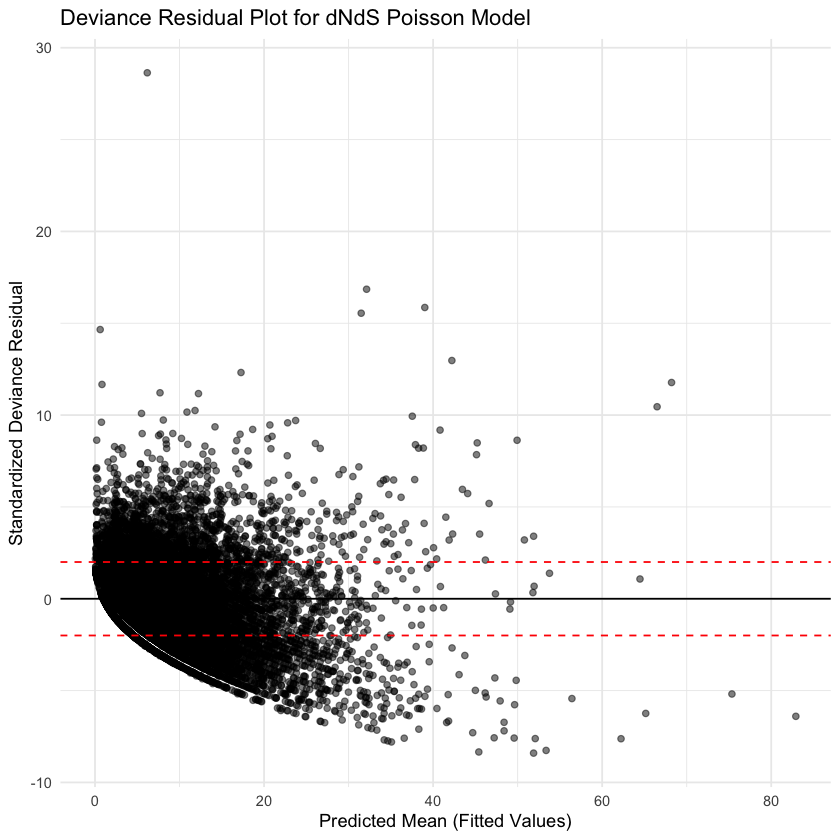

In [50]:
fitted_values <- fitted(alt2_model)
std_deviance_residuals <- residuals(combined_model, type = "deviance") / sqrt(summary(combined_model)$dispersion)

plot_data <- data.frame(
  Predicted_Mean = fitted_values,
  Std_Dev_Residual = std_deviance_residuals
)

ggplot(plot_data, aes(x = Predicted_Mean, y = Std_Dev_Residual)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "black", linetype = "solid") +
  geom_hline(yintercept = c(-2, 2), color = "red", linetype = "dashed") +
  labs(x = "Predicted Mean (Fitted Values)",
       y = "Standardized Deviance Residual",
       title = "Deviance Residual Plot for dNdS Poisson Model") +
  theme_minimal()

# Try different on NB

### Offset log gene length 

In [51]:
# Null Model
null_model <- glm.nb(observed_mutations ~ 1 + offset(log_gene_length), 
                     data = mutation_counts_filtered)

# Alternative Models
alt1_model <- glm.nb(observed_mutations ~ avg_sift + offset(log_gene_length), 
                     data = mutation_counts_filtered)

alt2_model <- glm.nb(observed_mutations ~ dN_dS + offset(log_gene_length), 
                     data = mutation_counts_filtered)


combined_model <- glm.nb(observed_mutations ~ avg_sift + dN_dS + offset(log_gene_length), 
                         data = mutation_counts_filtered)

# Likelihood Ratio Tests
models <- list("SIFT" = alt1_model, 
               "Mutation Type" = alt2_model,  
               "Combined" = combined_model)

for (name in names(models)) {
  alt_model <- models[[name]]
  print(AIC(null_model, models[[name]]))
  lrt <- lrtest(null_model, alt_model)
  cat(sprintf("\nLikelihood Ratio Test: %s vs. Null\n", name))
  cat(sprintf("LR Statistic: %.10f, P-value: %.40f\n", lrt[2, "Chisq"], lrt[2, "Pr(>Chisq)"]))
}


dispersion_stat <- summary(combined_model)$deviance / summary(combined_model)$df.residual
cat("\nDispersion statistic for Combined Negative Model:", dispersion_stat, "\n")
if (dispersion_stat > 1.5) {
  cat("Overdispersion.\n")
}

               df      AIC
null_model      2 96159.84
models[[name]]  3 96145.73

Likelihood Ratio Test: SIFT vs. Null
LR Statistic: 16.1070535897, P-value: 0.0000598606667731197626377073750525426021
               df      AIC
null_model      2 96159.84
models[[name]]  3 96007.72

Likelihood Ratio Test: Mutation Type vs. Null
LR Statistic: 154.1225927974, P-value: 0.0000000000000000000000000000000000217740
               df      AIC
null_model      2 96159.84
models[[name]]  4 95992.85

Likelihood Ratio Test: Combined vs. Null
LR Statistic: 170.9921852963, P-value: 0.0000000000000000000000000000000000000740

Dispersion statistic for Combined Negative Model: 1.050812 


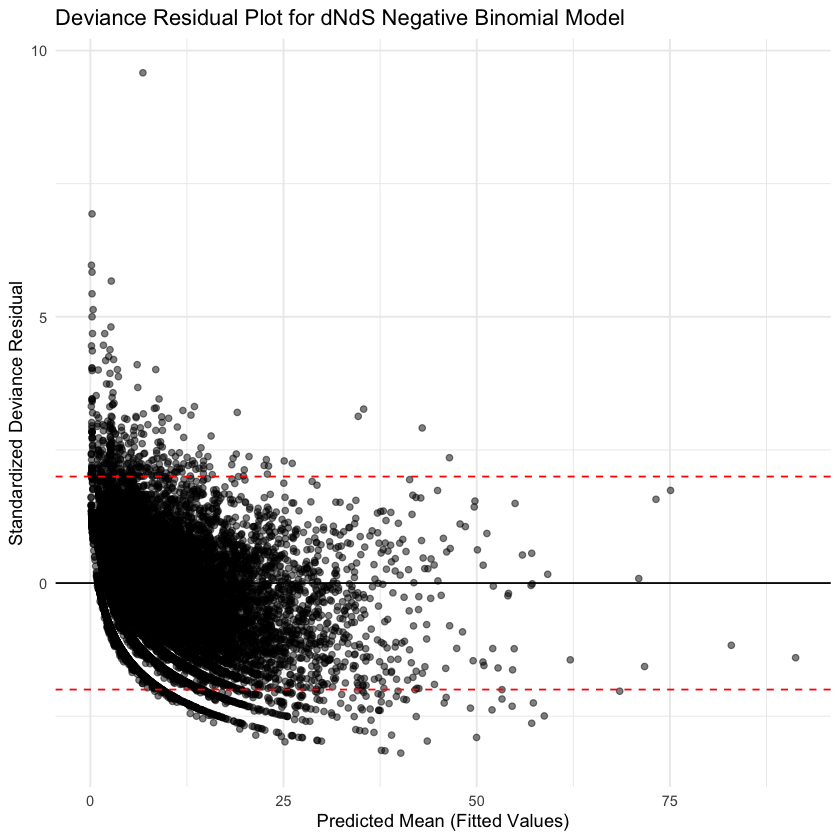

In [52]:
fitted_values <- fitted(alt2_model)
std_deviance_residuals <- residuals(combined_model, type = "deviance") / sqrt(summary(combined_model)$dispersion)

plot_data <- data.frame(
  Predicted_Mean = fitted_values,
  Std_Dev_Residual = std_deviance_residuals
)

ggplot(plot_data, aes(x = Predicted_Mean, y = Std_Dev_Residual)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "black", linetype = "solid") +
  geom_hline(yintercept = c(-2, 2), color = "red", linetype = "dashed") +
  labs(x = "Predicted Mean (Fitted Values)",
       y = "Standardized Deviance Residual",
       title = "Deviance Residual Plot for dNdS Negative Binomial Model") +
  theme_minimal()

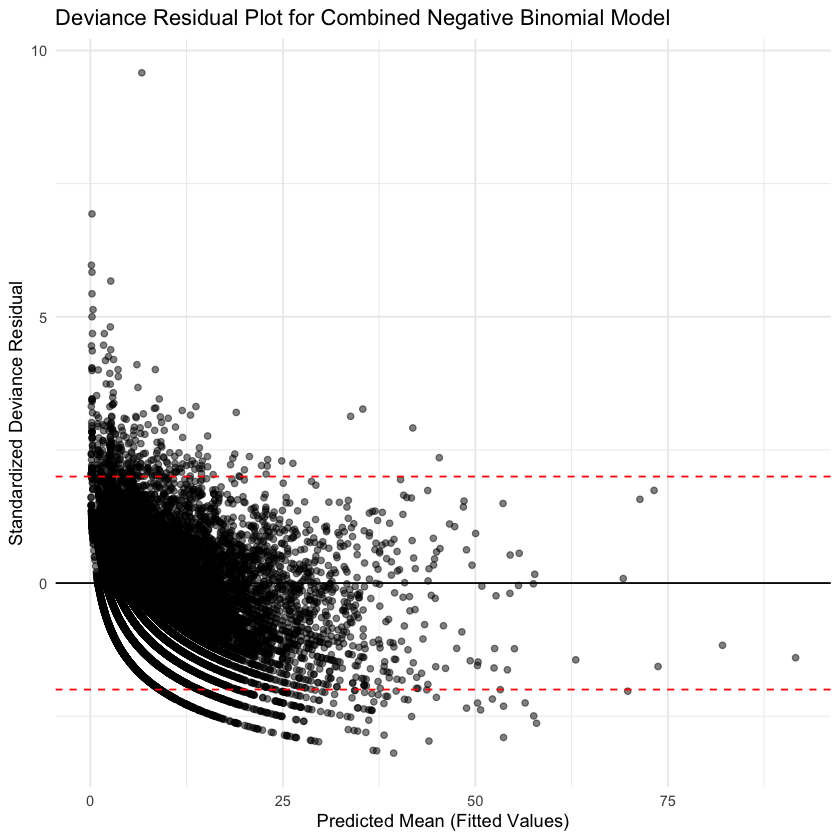

In [53]:
fitted_values <- fitted(combined_model)
std_deviance_residuals <- residuals(combined_model, type = "deviance") / sqrt(summary(combined_model)$dispersion)

plot_data <- data.frame(
  Predicted_Mean = fitted_values,
  Std_Dev_Residual = std_deviance_residuals
)

ggplot(plot_data, aes(x = Predicted_Mean, y = Std_Dev_Residual)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "black", linetype = "solid") +
  geom_hline(yintercept = c(-2, 2), color = "red", linetype = "dashed") +
  labs(x = "Predicted Mean (Fitted Values)",
       y = "Standardized Deviance Residual",
       title = "Deviance Residual Plot for Combined Negative Binomial Model") +
  theme_minimal()

### Offset log expected mutations

In [54]:
mutation_counts_filtered$log_expected_mutations = log(mutation_counts_filtered$expected_mutations)

In [55]:
# Null Model
null_model <- glm.nb(observed_mutations ~ 1 + offset(log_expected_mutations), 
                     data = mutation_counts_filtered)

# Alternative Models
alt1_model <- glm.nb(observed_mutations ~ avg_sift + offset(log_expected_mutations), 
                     data = mutation_counts_filtered)

alt2_model <- glm.nb(observed_mutations ~ dN_dS + offset(log_expected_mutations), 
                     data = mutation_counts_filtered)


combined_model <- glm.nb(observed_mutations ~ avg_sift + dN_dS + offset(log_expected_mutations), 
                         data = mutation_counts_filtered)

# Likelihood Ratio Tests
models <- list("SIFT" = alt1_model, 
               "Mutation Type" = alt2_model,  
               "Combined" = combined_model)

for (name in names(models)) {
  print(AIC(null_model, models[[name]]))
  alt_model <- models[[name]]
  lrt <- lrtest(null_model, alt_model)
  cat(sprintf("\nLikelihood Ratio Test: %s vs. Null\n", name))
  cat(sprintf("LR Statistic: %.10f, P-value: %.40f\n", lrt[2, "Chisq"], lrt[2, "Pr(>Chisq)"]))
}


dispersion_stat <- summary(combined_model)$deviance / summary(combined_model)$df.residual
cat("\nDispersion statistic for Combined Negative Model:", dispersion_stat, "\n")
if (dispersion_stat > 1.5) {
  cat("Overdispersion.\n")
}

               df      AIC
null_model      2 96159.84
models[[name]]  3 96145.73

Likelihood Ratio Test: SIFT vs. Null
LR Statistic: 16.1070535505, P-value: 0.0000598606680127115116547831252802325253
               df      AIC
null_model      2 96159.84
models[[name]]  3 96007.72

Likelihood Ratio Test: Mutation Type vs. Null
LR Statistic: 154.1225926756, P-value: 0.0000000000000000000000000000000000217740
               df      AIC
null_model      2 96159.84
models[[name]]  4 95992.85

Likelihood Ratio Test: Combined vs. Null
LR Statistic: 170.9921851337, P-value: 0.0000000000000000000000000000000000000740

Dispersion statistic for Combined Negative Model: 1.050812 


# Use the log gene length combined model


Genes under Positive Selection:
# A tibble: 30 × 6
   Hugo_Symbol observed_mutations expected_mutations_combined diff_obs_exp
   <chr>                    <int>                       <dbl>        <dbl>
 1 TP53                       173                       6.69        166.  
 2 SNORD115-40                 12                       0.217        11.8 
 3 MIR4747                      8                       0.143         7.86
 4 SNORD115-6                   9                       0.217         8.78
 5 KRAS                        35                       2.65         32.3 
 6 SNORD115-27                  8                       0.217         7.78
 7 SNORA22                      9                       0.354         8.65
 8 SNORD115-22                  7                       0.217         6.78
 9 PGM5                        27                       2.60         24.4 
10 RHOA                        20                       1.82         18.2 
# ℹ 20 more rows
# ℹ 2 more variables: ratio_obs

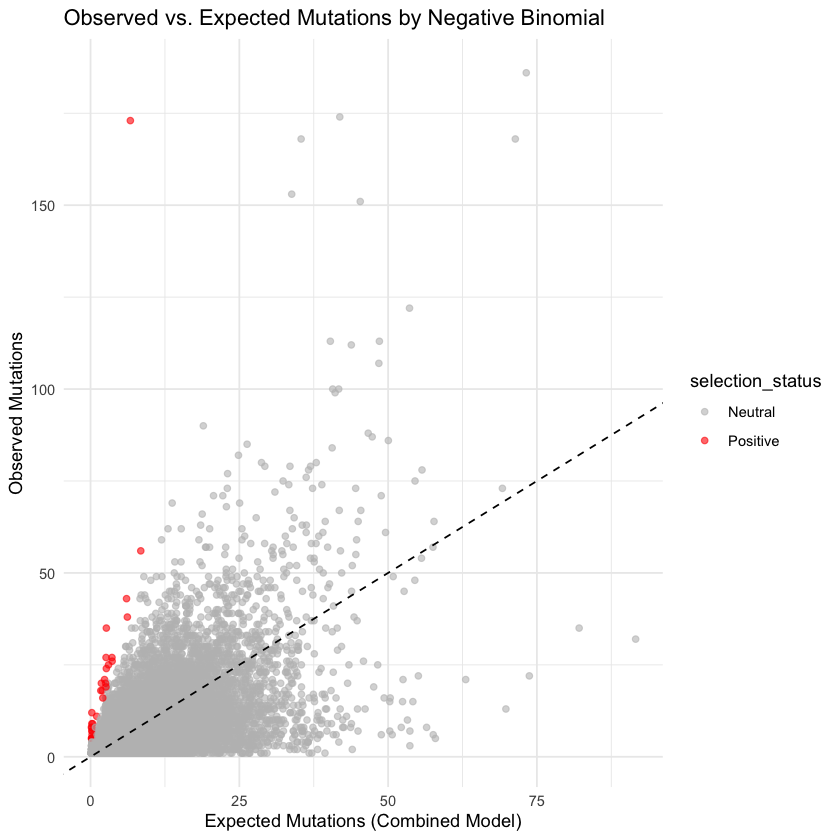

In [56]:
mutation_counts_filtered$expected_mutations_combined <- predict(combined_model, type = "response")

mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(
    diff_obs_exp = observed_mutations - expected_mutations_combined,
    ratio_obs_exp = observed_mutations / expected_mutations_combined
  )

# Use a Negative Binomial test: compare observed to expected under the NB distribution
mutation_counts_filtered$p_value <- sapply(1:nrow(mutation_counts_filtered), function(i) {
  obs <- mutation_counts_filtered$observed_mutations[i]
  exp <- mutation_counts_filtered$expected_mutations_combined[i]
  theta <- combined_model$theta
  if (obs > exp) {
    p <- 1 - pnbinom(obs - 1, mu = exp, size = theta)
  } else {
    p <- pnbinom(obs, mu = exp, size = theta)
  }
  return(p)
})



mutation_counts_filtered$adj_p_value <- p.adjust(mutation_counts_filtered$p_value, method = "BH")
mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(
    selection_status = case_when(
      adj_p_value < 0.05 & ratio_obs_exp > 1 ~ "Positive",
      adj_p_value < 0.05 & ratio_obs_exp < 1 ~ "Negative",
      TRUE ~ "Neutral"
    )
  )

positive_selection <- mutation_counts_filtered %>%
  filter(selection_status == "Positive") %>%
  arrange(adj_p_value) %>%
  dplyr::select(Hugo_Symbol, observed_mutations, expected_mutations_combined, diff_obs_exp, ratio_obs_exp, adj_p_value)

negative_selection <- mutation_counts_filtered %>%
  filter(selection_status == "Negative") %>%
  arrange(adj_p_value) %>%
  dplyr::select(Hugo_Symbol, observed_mutations, expected_mutations_combined, diff_obs_exp, ratio_obs_exp, adj_p_value)

cat("\nGenes under Positive Selection:\n")
print(positive_selection)
cat("\nGenes under Negative Selection:\n")
print(negative_selection)

ggplot(mutation_counts_filtered, aes(x = expected_mutations_combined, y = observed_mutations, color = selection_status)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "gray")) +
  labs(x = "Expected Mutations (Combined Model)", y = "Observed Mutations",
       title = "Observed vs. Expected Mutations by Negative Binomial") +
  theme_minimal()

In [57]:
print(AIC(combined_model))

[1] 95992.85


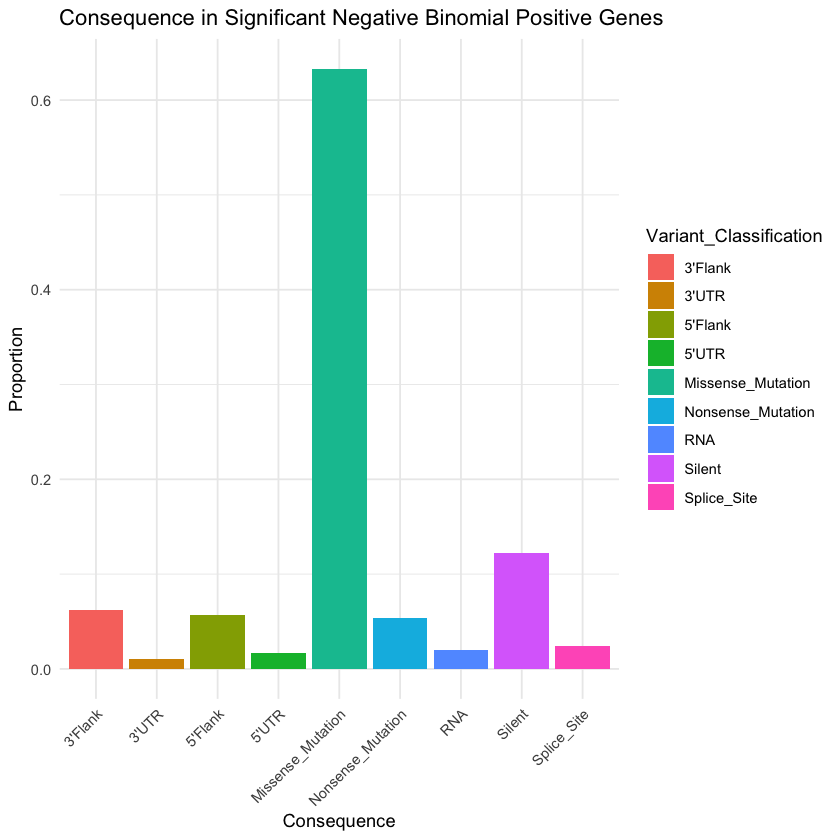

In [58]:
pos_positive_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05)

significant_genes <- pos_positive_genes$Hugo_Symbol
consequence_summary <- STAD_mutation_filtered_pass %>%
  filter(Hugo_Symbol %in% significant_genes) %>%
  group_by(Hugo_Symbol, Variant_Classification) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Variant_Classification) %>%
  summarise(total_count = sum(count), .groups = "drop")

consequence_summary <- consequence_summary %>%
  mutate(proportion = total_count / sum(total_count))

ggplot(consequence_summary, aes(x = Variant_Classification, y = proportion, fill = Variant_Classification)) +
  geom_bar(stat = "identity") +
  labs(title = "Consequence in Significant Negative Binomial Positive Genes",
       x = "Consequence", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## dndscv log expected syn mutations

In [59]:
dNdScv_model <- glm.nb(dS ~ dN_dS + offset(log(expected_syn + 1e-6)), 
                   data = mutation_counts_filtered)

mutation_counts_filtered$expected_syn_predicted <- fitted(dNdScv_model)

models <- list("dNdS Model" = dNdScv_model)

for (name in names(models)) {
  alt_model <- models[[name]]
  print(AIC(null_model, models[[name]]))
  lrt <- lrtest(null_model, alt_model)
  cat(sprintf("\nLikelihood Ratio Test: %s vs. Null\n", name))
  cat(sprintf("LR Statistic: %.30f, P-value: %.30f\n", lrt[2, "Chisq"], lrt[2, "Pr(>Chisq)"]))
}

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted rates numerically 0 occurred”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu,

               df      AIC
null_model      2 96159.84
models[[name]]  3 45678.17

Likelihood Ratio Test: dNdS Model vs. Null
LR Statistic: 50483.670367369049927219748497009277, P-value: 0.000000000000000000000000000000


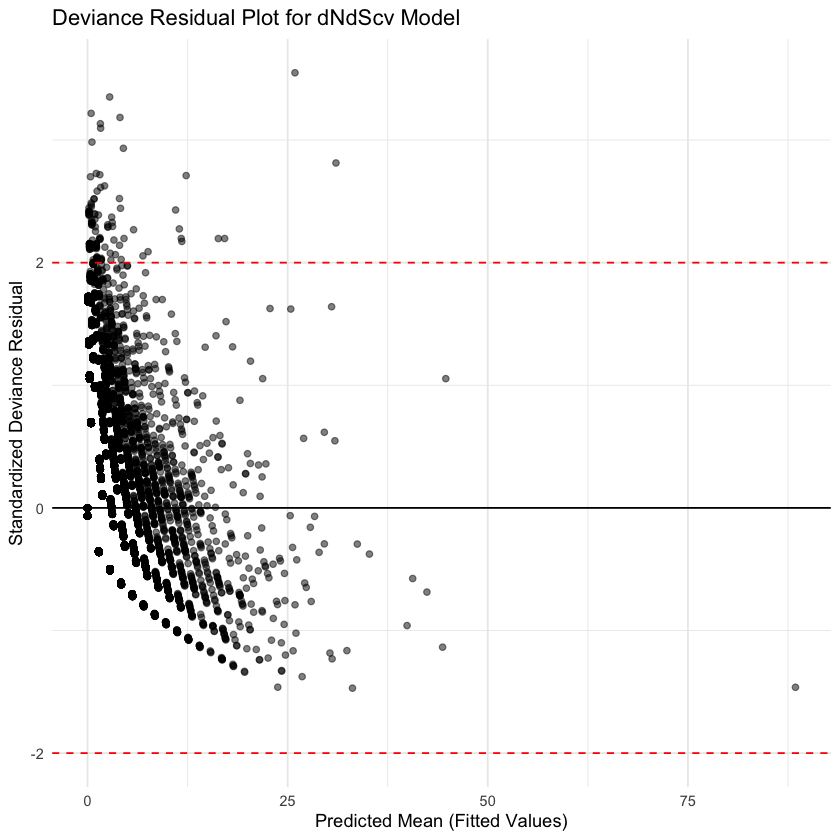

In [60]:
fitted_values <- fitted(dNdScv_model)
std_deviance_residuals <- residuals(dNdScv_model, type = "deviance") / sqrt(summary(dNdScv_model)$dispersion)

plot_data <- data.frame(
  Predicted_Mean = fitted_values,
  Std_Dev_Residual = std_deviance_residuals
)

ggplot(plot_data, aes(x = Predicted_Mean, y = Std_Dev_Residual)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "black", linetype = "solid") +
  geom_hline(yintercept = c(-2, 2), color = "red", linetype = "dashed") +
  labs(x = "Predicted Mean (Fitted Values)",
       y = "Standardized Deviance Residual",
       title = "Deviance Residual Plot for dNdScv Model") +
  theme_minimal()

In [61]:
mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(
    expected_dN_predicted = expected_syn_predicted * dN_dS
)

In [63]:
mutation_counts_filtered$p_value_dN <- sapply(1:nrow(mutation_counts_filtered), function(i) {
  obs <- mutation_counts_filtered$dN[i]
  exp <- mutation_counts_filtered$expected_dN_predicted[i]
  theta <- dNdScv_model$theta
  if (obs > exp) {
    p <- 1 - pnbinom(obs - 1, mu = exp, size = theta)
  } else {
    p <- pnbinom(obs, mu = exp, size = theta)
  }
  return(p)
})


mutation_counts_filtered$adj_p_value_dN <- p.adjust(mutation_counts_filtered$p_value_dN, method = "BH")

In [64]:
# mutation_counts_filtered$adj_p_value_dN <- p.adjust(mutation_counts_filtered$p_value_dN, method = "bonferroni")

In [65]:
mutation_counts_filtered$predicted_dNdS = mutation_counts_filtered$expected_dN_predicted / mutation_counts_filtered$expected_syn_predicted

In [66]:
mutation_counts_filtered <- mutation_counts_filtered %>%
  mutate(
    dndscv_selection = case_when(
      adj_p_value_dN < 0.05 & predicted_dNdS < dN_dS ~ "Positive",
      adj_p_value_dN < 0.05 & predicted_dNdS > dN_dS ~ "Negative",
      TRUE ~ "Neutral"
    )
  )

In [67]:
table(mutation_counts_filtered$dndscv_selection)


Negative  Neutral Positive 
      30    15384      563 

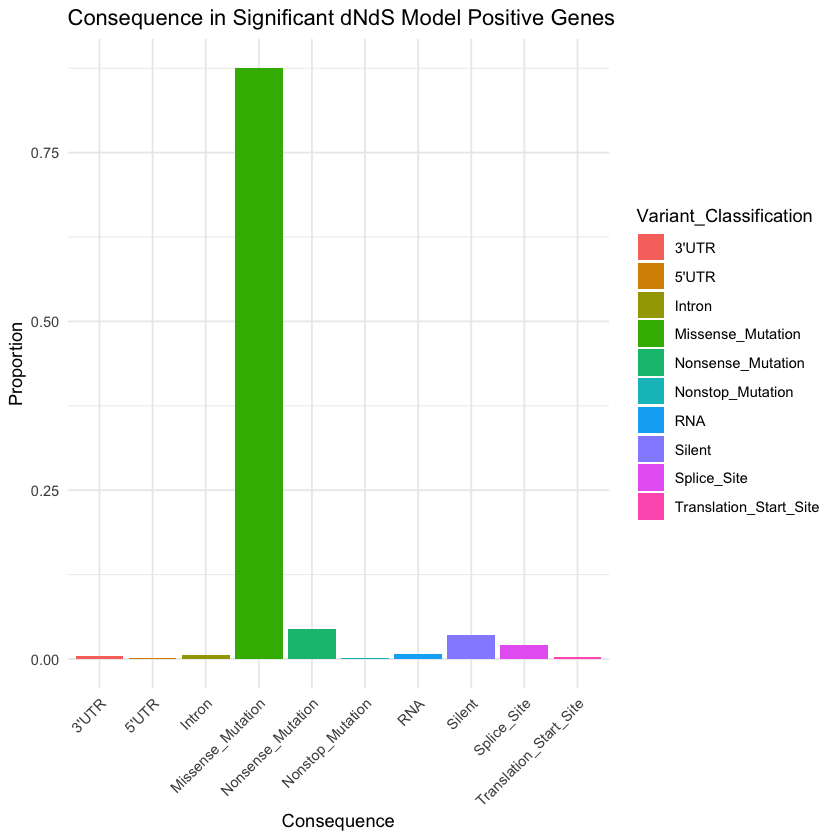

In [68]:
pos_positive_genes <- mutation_counts_filtered %>%
  filter(dndscv_selection == "Positive" & adj_p_value_dN < 0.05)

significant_genes <- pos_positive_genes$Hugo_Symbol
consequence_summary <- STAD_mutation_filtered_pass %>%
  filter(Hugo_Symbol %in% significant_genes) %>%
  group_by(Hugo_Symbol, Variant_Classification) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Variant_Classification) %>%
  summarise(total_count = sum(count), .groups = "drop")

consequence_summary <- consequence_summary %>%
  mutate(proportion = total_count / sum(total_count))

ggplot(consequence_summary, aes(x = Variant_Classification, y = proportion, fill = Variant_Classification)) +
  geom_bar(stat = "identity") +
  labs(title = "Consequence in Significant dNdS Model Positive Genes",
       x = "Consequence", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

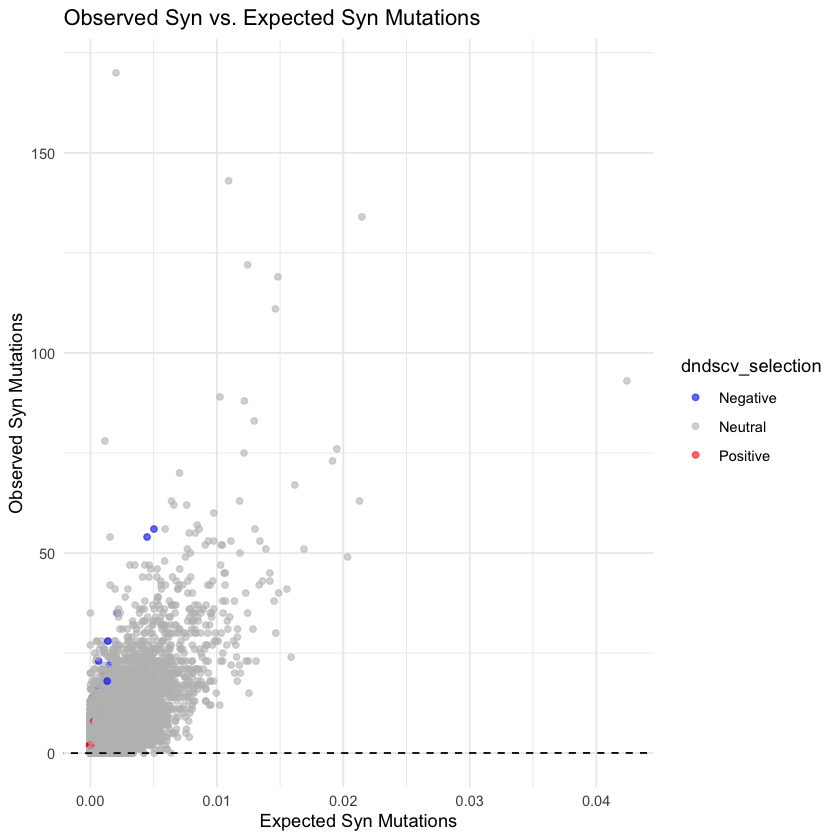

In [69]:
ggplot(mutation_counts_filtered, aes(x = expected_syn, y = dN, color = dndscv_selection)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "gray")) +
  labs(x = "Expected Syn Mutations", y = "Observed Syn Mutations",
       title = "Observed Syn vs. Expected Syn Mutations") +
  theme_minimal()

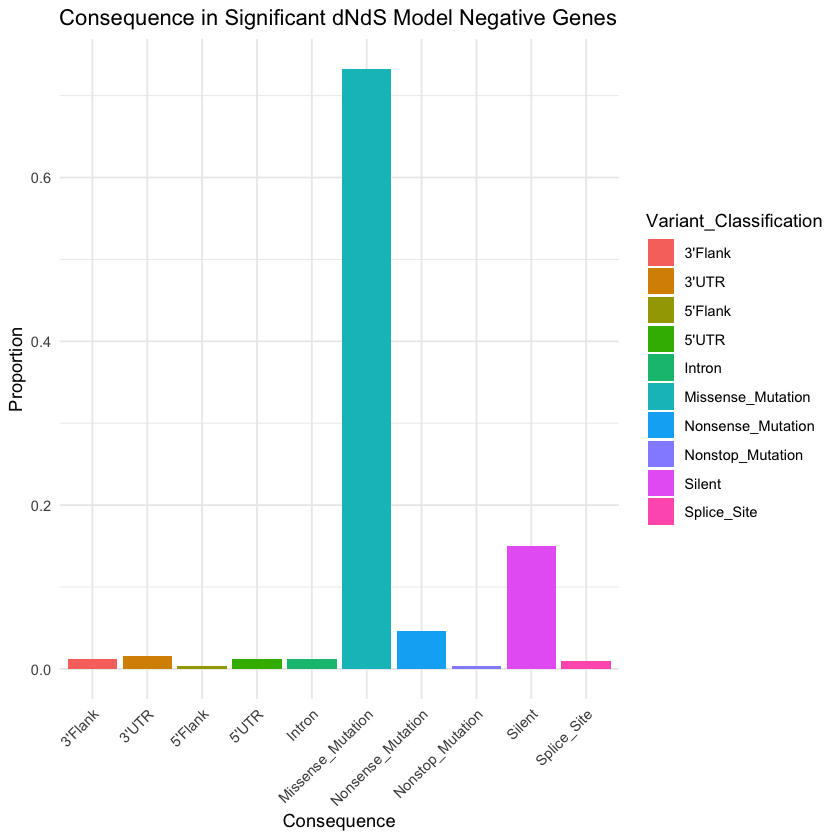

In [70]:
pos_positive_genes <- mutation_counts_filtered %>%
  filter(dndscv_selection == "Negative" & adj_p_value_dN < 0.05)

significant_genes <- pos_positive_genes$Hugo_Symbol
consequence_summary <- STAD_mutation_filtered_pass %>%
  filter(Hugo_Symbol %in% significant_genes) %>%
  group_by(Hugo_Symbol, Variant_Classification) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Variant_Classification) %>%
  summarise(total_count = sum(count), .groups = "drop")

consequence_summary <- consequence_summary %>%
  mutate(proportion = total_count / sum(total_count))

ggplot(consequence_summary, aes(x = Variant_Classification, y = proportion, fill = Variant_Classification)) +
  geom_bar(stat = "identity") +
  labs(title = "Consequence in Significant dNdS Model Negative Genes",
       x = "Consequence", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

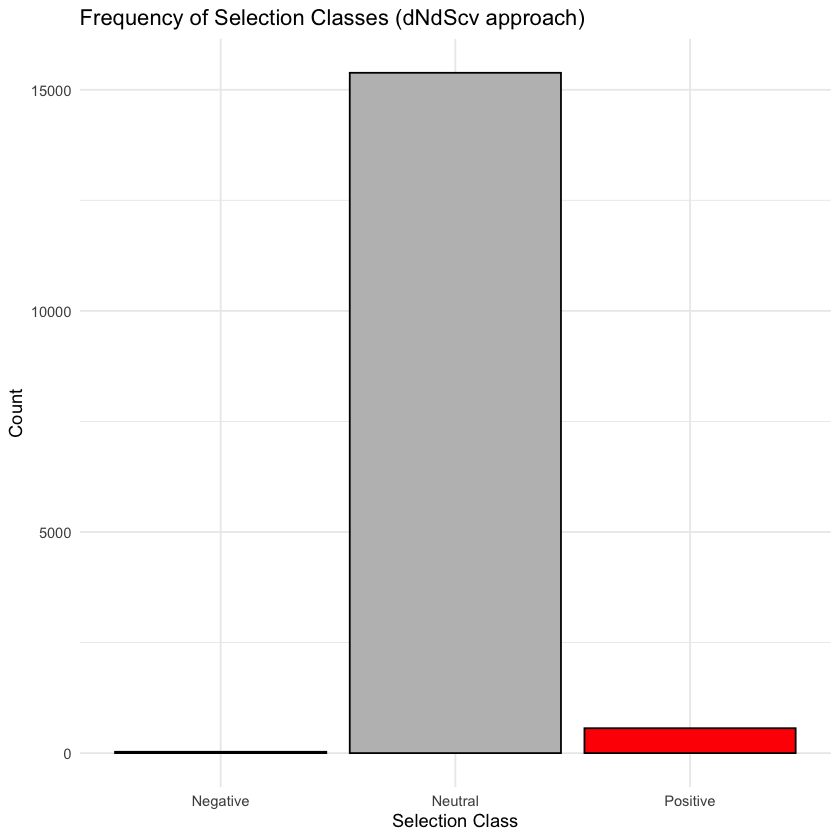

In [71]:
class_counts_df <- as.data.frame(table(mutation_counts_filtered$dndscv_selection))
colnames(class_counts_df) <- c("Selection_Class", "Count")

ggplot(class_counts_df, aes(x = Selection_Class, y = Count, fill = Selection_Class)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "grey")) +
  labs(x = "Selection Class", y = "Count", 
       title = "Frequency of Selection Classes (dNdScv approach)") +
  theme_minimal() +
  theme(legend.position = "none")

### End of dndscv approach

In [72]:
selected_data <- subset(mutation_counts_filtered, 
                        select = c("expected_mutations", "expected_mutations_combined"))

In [73]:
cor(x = selected_data$expected_mutations, y = selected_data$expected_mutations_combined, use = "everything",
    method = c("pearson"))

cor(x = selected_data$expected_mutations, y = selected_data$expected_mutations_combined, use = "everything",
    method = c("spearman"))

[1] 0.9956462

[1] 0.9947577

## Apply binomial on dN/dS or dN/(dN + dS)

In [74]:
expected_dN_dS <- mean(mutation_counts_filtered$dN) / mean(mutation_counts_filtered$dS)
mutation_counts_filtered$total_mutations <- mutation_counts_filtered$dN + mutation_counts_filtered$dS
# mutation_counts_filtered$expected_dN <- mutation_counts_filtered$dS * expected_dN_dS
# mutation_counts_filtered$adj_total_mutations <- mutation_counts_filtered$expected_dN + mutation_counts_filtered$dS

mutation_counts_filtered$dN_frac <- mutation_counts_filtered$dN / (mutation_counts_filtered$dN + mutation_counts_filtered$dS)
expected_dN_frac <- mean(mutation_counts_filtered$dN) / (mean(mutation_counts_filtered$dN) + mean(mutation_counts_filtered$dS))
mutation_counts_filtered$expected_dN <- as.integer(mutation_counts_filtered$total_mutations * expected_dN_frac)

mutation_counts_filtered$dnds_p_value <- mapply(function(dN, total, exp_dN) {
  if (total == 0) return(1)
  binom.test(dN, total, p = exp_dN/total, alternative = "two.sided")$p.value
}, mutation_counts_filtered$dN, mutation_counts_filtered$total_mutations, mutation_counts_filtered$expected_dN)

mutation_counts_filtered$dnds_adj_p_value <- p.adjust(mutation_counts_filtered$dnds_p_value, method = "BH")
mutation_counts_filtered$dnds_selection <- ifelse(mutation_counts_filtered$dnds_adj_p_value < 0.05 & 
                                                  mutation_counts_filtered$dN > mutation_counts_filtered$expected_dN, "Positive",
                                                  ifelse(mutation_counts_filtered$dnds_adj_p_value < 0.05 & 
                                                         mutation_counts_filtered$dN < mutation_counts_filtered$expected_dN, "Negative", "Neutral"))

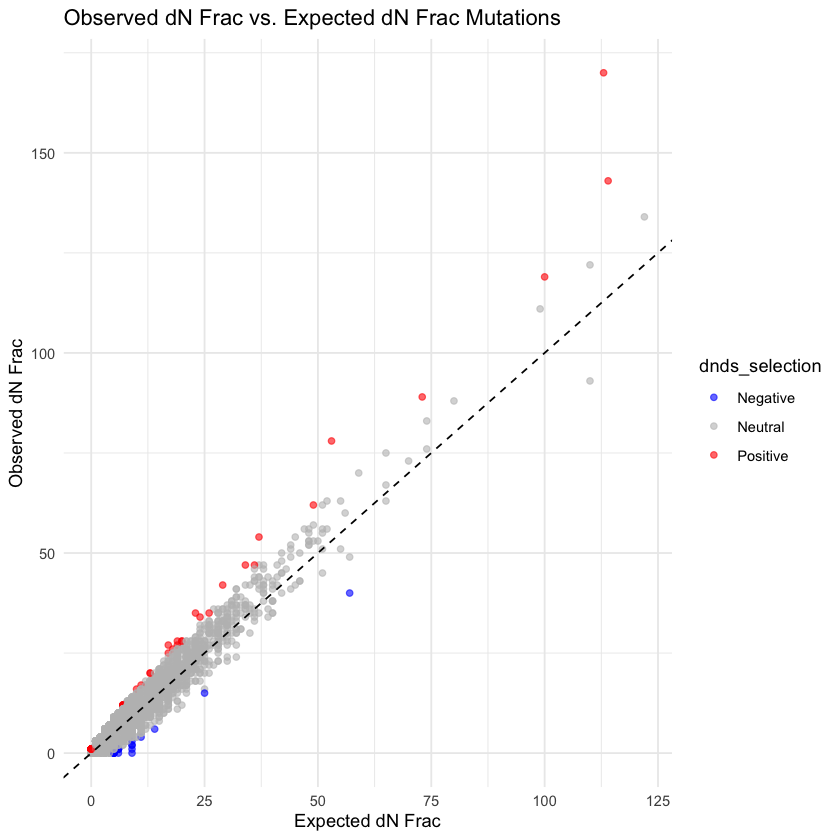

In [75]:
ggplot(mutation_counts_filtered, aes(x = expected_dN, y = dN, color = dnds_selection)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  scale_color_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "gray")) +
  labs(x = "Expected dN Frac", y = "Observed dN Frac",
       title = "Observed dN Frac vs. Expected dN Frac Mutations") +
  theme_minimal()

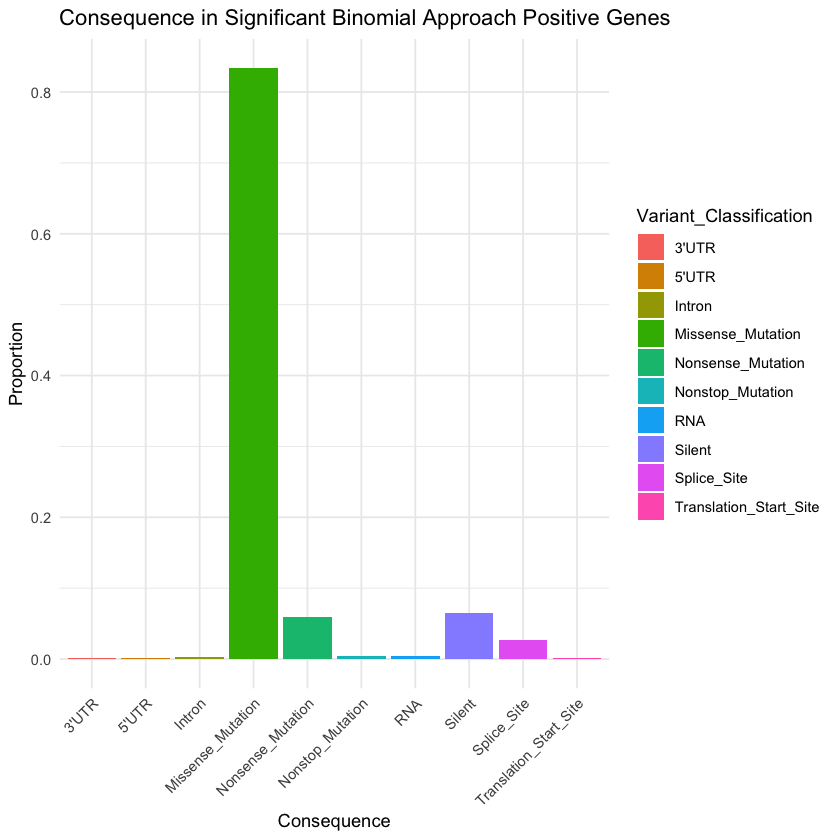

In [76]:
pos_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05)

significant_genes <- pos_positive_genes$Hugo_Symbol
consequence_summary <- STAD_mutation_filtered_pass %>%
  filter(Hugo_Symbol %in% significant_genes) %>%
  group_by(Hugo_Symbol, Variant_Classification) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Variant_Classification) %>%
  summarise(total_count = sum(count), .groups = "drop")

consequence_summary <- consequence_summary %>%
  mutate(proportion = total_count / sum(total_count))

ggplot(consequence_summary, aes(x = Variant_Classification, y = proportion, fill = Variant_Classification)) +
  geom_bar(stat = "identity") +
  labs(title = "Consequence in Significant Binomial Approach Positive Genes",
       x = "Consequence", y = "Proportion") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

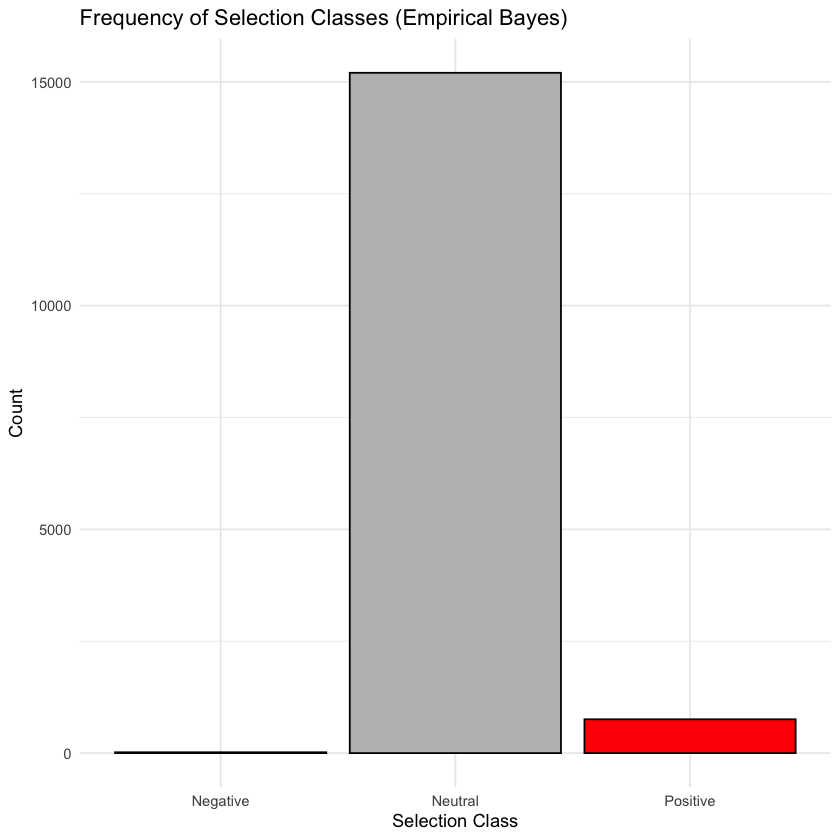

In [77]:
class_counts_df <- as.data.frame(table(mutation_counts_filtered$dnds_selection))
colnames(class_counts_df) <- c("Selection_Class", "Count")

ggplot(class_counts_df, aes(x = Selection_Class, y = Count, fill = Selection_Class)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("Positive" = "red", "Negative" = "blue", "Neutral" = "grey")) +
  labs(x = "Selection Class", y = "Count", 
       title = "Frequency of Selection Classes (Empirical Bayes)") +
  theme_minimal() +
  theme(legend.position = "none")

# Benchmark against filtered STAD_mutation

In [78]:
STAD_mutation_sub <- STAD_mutation_filtered_pass[, c("patient_id", "Chromosome", "Start_Position", "Reference_Allele", "Tumor_Seq_Allele2")]
colnames(STAD_mutation_sub) <- c("sampleID", "chr", "pos", "ref", "mut")

In [79]:
STAD_dndsout <- dndscv(STAD_mutation_sub)

[1] Loading the environment...

[2] Annotating the mutations...

Warning message in dndscv(STAD_mutation_sub):
“Mutations observed in contiguous sites within a sample. Please annotate or remove dinucleotide or complex substitutions for best results.”
Warning message in dndscv(STAD_mutation_sub):
“Same mutations observed in different sampleIDs. Please verify that these are independent events and remove duplicates otherwise.”
    Note: 1 samples excluded for exceeding the limit of mutations per sample (see the max_coding_muts_per_sample argument in dndscv). 405 samples left after filtering.

    Note: 168 mutations removed for exceeding the limit of mutations per gene per sample (see the max_muts_per_gene_per_sample argument in dndscv)

    7% ...

    14% ...

    22% ...

    29% ...

    36% ...

    43% ...

    51% ...

    58% ...

    65% ...

    72% ...

    80% ...

    87% ...

    94% ...

[3] Estimating global rates...

[4] Running dNdSloc...

[5] Running dNdScv...

    Regr

In [80]:
print(STAD_dndsout$nbreg$theta)

[1] 5.415531


In [81]:
STAD_sel_cv = STAD_dndsout$sel_cv
STAD_signif_genes = STAD_sel_cv[STAD_sel_cv$qallsubs_cv<0.05, c("gene_name","qallsubs_cv")]

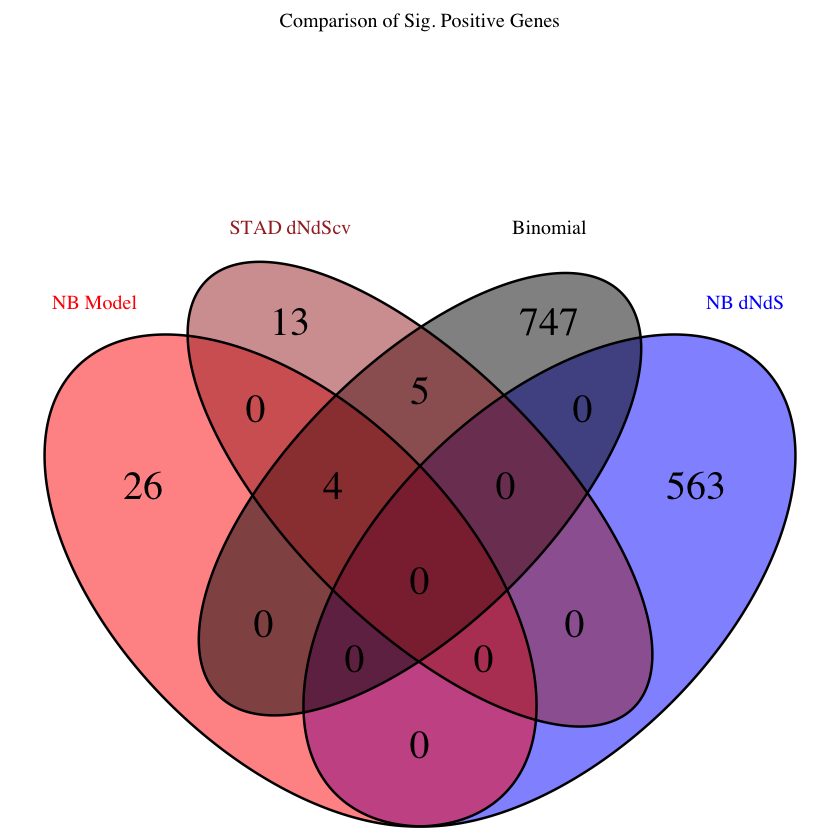

In [82]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_positive_genes <- mutation_counts_filtered %>%
  filter(dndscv_selection == "Positive" & adj_p_value_dN < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

bi_dnds_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

fill_colors <- c("red", "blue", 'brown', 'black')

venn_plot <- venn.diagram(
  x = list(
    "NB Model" = nb_sig_genes,
    "NB dNdS" = dndscv_positive_genes,
    "STAD dNdScv" = dndscv_significant_genes,
    "Binomial" = bi_dnds_positive_genes
  ),
  filename = NULL, 
  fill = fill_colors,
  main = "Comparison of Sig. Positive Genes",
  alpha = 0.5,
  label.col = "black",
  cex = 2, 
  cat.cex = 1,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

In [83]:
intersect(nb_sig_genes, dndscv_significant_genes)

[1] "KRAS" "PGM5" "RHOA" "TP53"

In [84]:
intersect(bi_dnds_positive_genes, dndscv_significant_genes)

[1] "ARID1A" "CDH1"   "ERBB3"  "KRAS"   "PGM5"   "PIK3CA" "RHOA"   "SMAD4" 
[9] "TP53"

In [85]:
signif_genes_localmodel = as.vector(STAD_dndsout$sel_loc$gene_name[STAD_dndsout$sel_loc$qall_loc<0.05])
print(signif_genes_localmodel)

[1] "TP53"   "ARID1A" "PIK3CA" "KRAS"   "APC"    "MLH1"   "ARID2"  "ERBB3" 
[9] "PPP3CA"


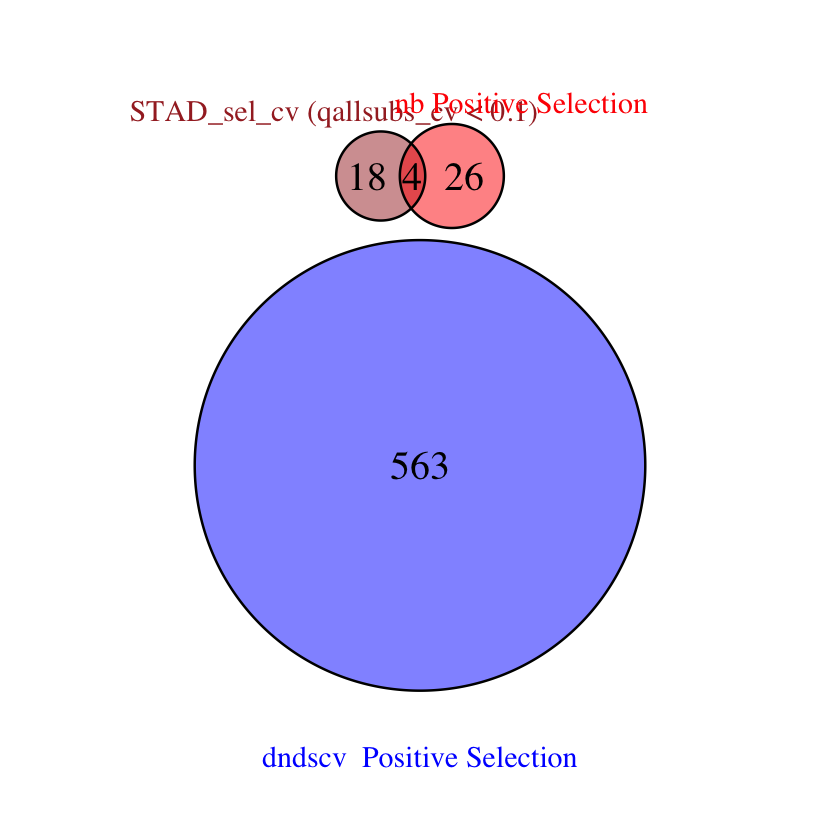

In [86]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_positive_genes <- mutation_counts_filtered %>%
  filter(dndscv_selection == "Positive" & adj_p_value_dN < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

fill_colors <- c("red", "blue", 'brown')

venn_plot <- venn.diagram(
  x = list(
    "nb Positive Selection" = nb_sig_genes,
    "dndscv  Positive Selection" = dndscv_positive_genes,
    "STAD_sel_cv (qallsubs_cv < 0.1)" = dndscv_significant_genes
  ),
  filename = NULL, 
  fill = fill_colors,
  alpha = 0.5,
  label.col = "black",
  cex = 2, 
  cat.cex = 1.5,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

In [87]:
IntOGen = read_tsv("IntOGen-DriverGenes_STAD.tsv", quote="\"")

Rows: 74 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Symbol
dbl (4): Mutations, Samples, Samples (%), Cohorts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [88]:
head(IntOGen)

Symbol,Mutations,Samples,Samples (%),Cohorts
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TP53,359,291,35.79,5
CSMD3,184,126,15.50,4
ARID1A,111,77,9.47,4
PIK3CA,79,68,8.36,4
FAT4,133,68,8.36,1
APC,61,46,5.66,4


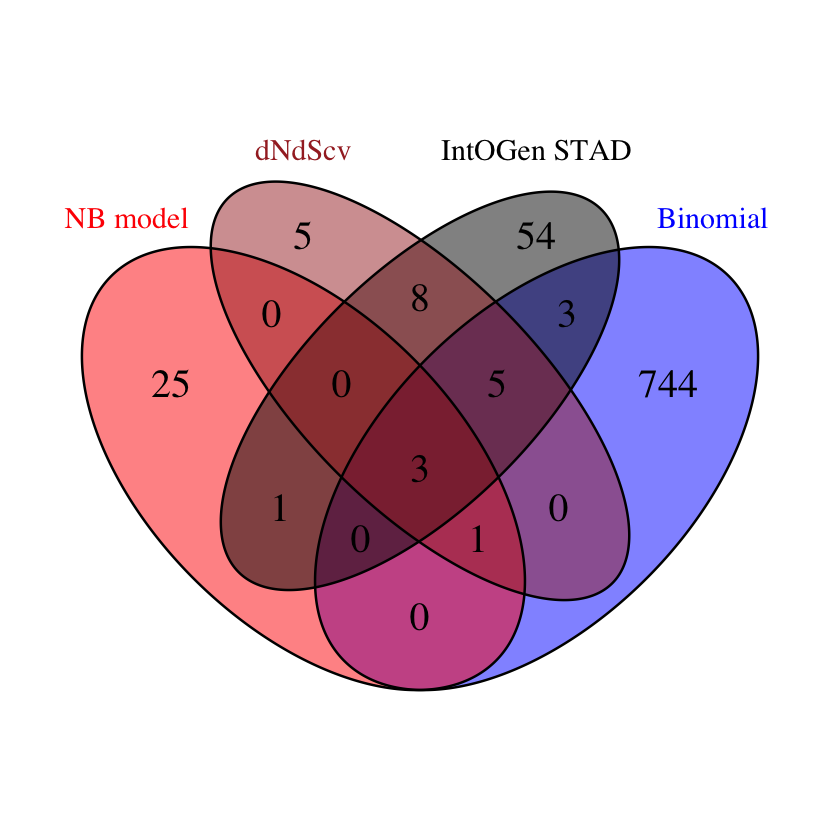

In [89]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

bi_dnds_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

IntOGen_genes <- IntOGen %>%
  pull(Symbol) %>%
  unique()

fill_colors <- c("red", "blue", 'brown', 'black')

venn_plot <- venn.diagram(
  x = list(
    "NB model" = nb_sig_genes,
    "Binomial" = bi_dnds_positive_genes,
    "dNdScv" = dndscv_significant_genes,
    "IntOGen STAD" = IntOGen_genes
  ),
  filename = NULL, 
  fill = fill_colors,
  alpha = 0.5,
  label.col = "black",
  cex = 2, 
  cat.cex = 1.5,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

In [90]:
intersect(bi_dnds_positive_genes, IntOGen_genes)

[1] "ARID1A" "CDH1"   "ERBB3"  "KMT2D"  "KRAS"   "LRP1B"  "NBEA"   "PIK3CA"
 [9] "RHOA"   "SMAD4"  "TP53"

# Take a look at full STAD_mutation

In [91]:
full_STAD_mutation <- STAD_mutation[, c("patient_id", "Chromosome", "Start_Position", "Reference_Allele", "Tumor_Seq_Allele2")]
colnames(full_STAD_mutation) <- c("sampleID", "chr", "pos", "ref", "mut")

In [92]:
full_STAD_dndsout <- dndscv(full_STAD_mutation)

[1] Loading the environment...

[2] Annotating the mutations...

Warning message in dndscv(full_STAD_mutation):
“Mutations observed in contiguous sites within a sample. Please annotate or remove dinucleotide or complex substitutions for best results.”
Warning message in dndscv(full_STAD_mutation):
“Same mutations observed in different sampleIDs. Please verify that these are independent events and remove duplicates otherwise.”
    Note: 6 samples excluded for exceeding the limit of mutations per sample (see the max_coding_muts_per_sample argument in dndscv). 409 samples left after filtering.

    Note: 372 mutations removed for exceeding the limit of mutations per gene per sample (see the max_muts_per_gene_per_sample argument in dndscv)

    7% ...

    15% ...

    22% ...

    30% ...

    37% ...

    44% ...

    52% ...

    59% ...

    66% ...

    74% ...

    81% ...

    89% ...

    96% ...

[3] Estimating global rates...

[4] Running dNdSloc...

[5] Running dNdScv...

    Re

In [93]:
print(full_STAD_dndsout$nbreg$theta)

[1] 5.506695


In [94]:
full_signif_genes_localmodel = as.vector(full_STAD_dndsout$sel_loc$gene_name[full_STAD_dndsout$sel_loc$qall_loc<0.1])
print(full_signif_genes_localmodel)

[1] "TP53"   "ARID1A" "PIK3CA" "KRAS"   "APC"    "MLH1"   "ARID2"  "PPP3CA"
[9] "ERBB3" 


In [95]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:VennDiagram’:

    ellipse


The following object is masked from ‘package:dplyr’:

    recode




In [96]:
vif(combined_model)

avg_sift    dN_dS 
1.000501 1.000501

# 20250429_oncodriveFML_corrected

In [97]:
FML = read_delim("20250429cbase/q_values_20250429cbase.txt", delim="\t", skip = 1)

Rows: 18439 Columns: 30
── Column specification ───────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): gene
dbl (29): p_phi_m_neg, q_phi_m_neg, phi_m_neg, p_phi_k_neg, q_phi_k_neg, phi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


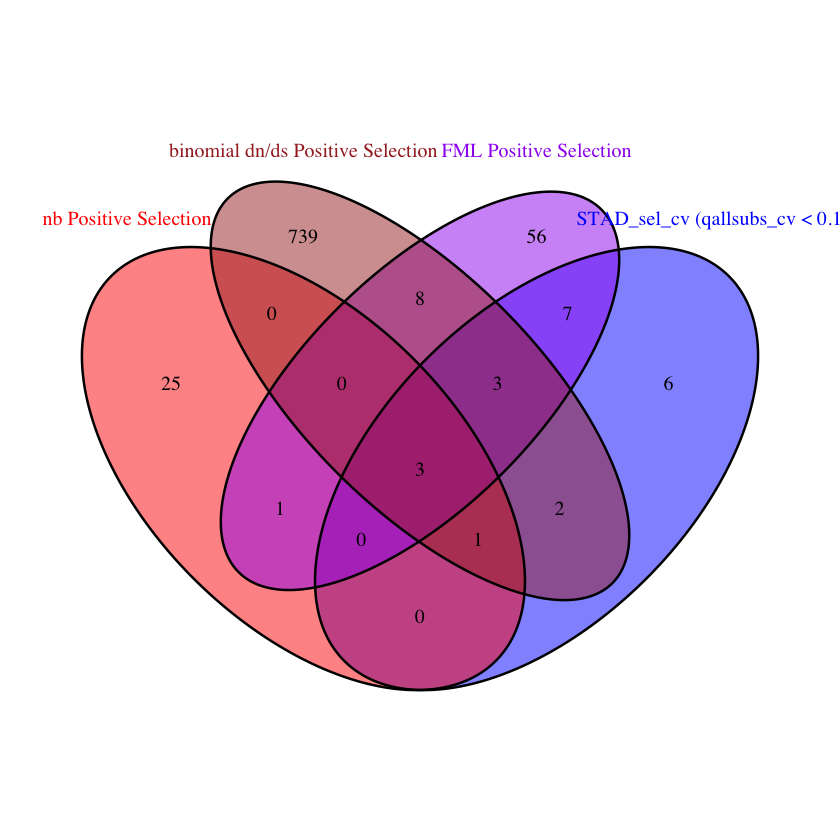

In [98]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

bi_dnds_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

FML_sig_genes <- FML %>%
  filter(q_phi_pos < 0.05) %>%
  pull(gene) %>%
  unique()

fill_colors <- c("red", "blue", 'brown', 'purple')

venn_plot <- venn.diagram(
  x = list(
    "nb Positive Selection" = nb_sig_genes,
    "STAD_sel_cv (qallsubs_cv < 0.1)" = dndscv_significant_genes,
    "binomial dn/ds Positive Selection" = bi_dnds_positive_genes,
    "FML Positive Selection" = FML_sig_genes
  ),
  filename = NULL, 
  fill = fill_colors,
  # alpha = 0.5,
  label.col = "black",
  # cex = 2, 
  # cat.cex = 1.5,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

#  20250429_oncodriveCLUSTL_STAD_corrected

In [99]:
CLUSTL = read_delim("20250429_oncoCLUST/clusters_results.tsv", delim="\t", show_col_types = FALSE)

In [100]:
CLUSTL$adj_p_value <- p.adjust(CLUSTL$P, method = "BH")

In [101]:
CLUSTL_sig <- CLUSTL[CLUSTL$adj_p_value < 0.05, ]

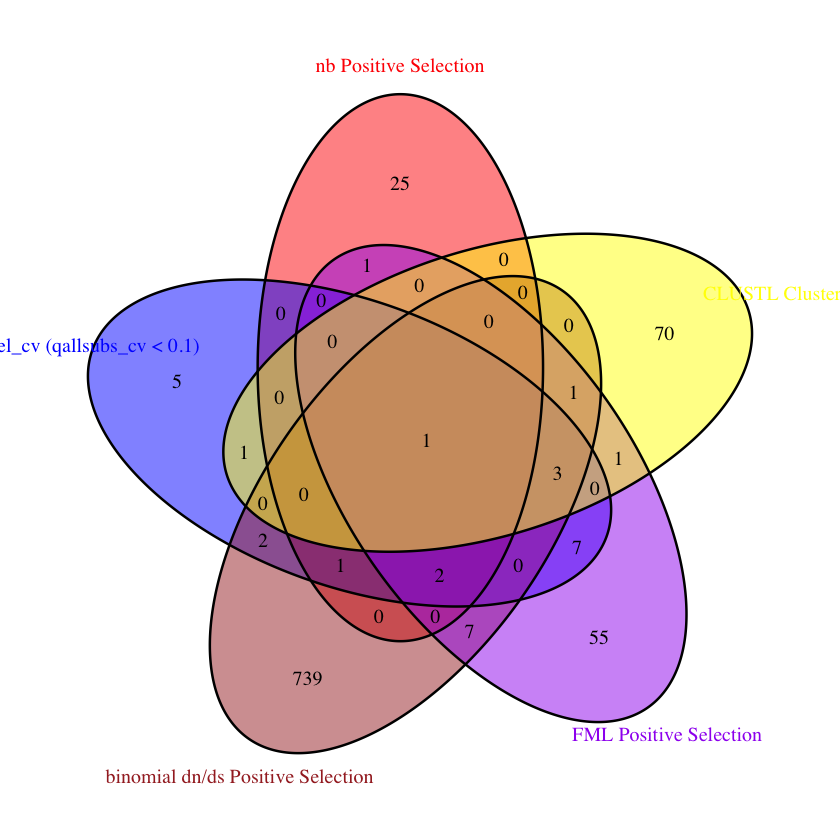

In [102]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

bi_dnds_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

FML_sig_genes <- FML %>%
  filter(q_phi_pos < 0.05) %>%
  pull(gene) %>%
  unique()

CLUSTL_sig <- CLUSTL %>%
  filter(adj_p_value < 0.05) %>%
  pull(SYMBOL) %>%
  unique()

fill_colors <- c("red", "blue", 'brown', 'purple', 'yellow')

venn_plot <- venn.diagram(
  x = list(
    "nb Positive Selection" = nb_sig_genes,
    "STAD_sel_cv (qallsubs_cv < 0.1)" = dndscv_significant_genes,
    "binomial dn/ds Positive Selection" = bi_dnds_positive_genes,
    "FML Positive Selection" = FML_sig_genes,
    "CLUSTL Clusters" = CLUSTL_sig
  ),
  filename = NULL, 
  fill = fill_colors,
  # alpha = 0.5,
  label.col = "black",
  # cex = 2, 
  # cat.cex = 1.5,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

In [103]:
nb_sig_genes <- unique(toupper(nb_sig_genes))
bi_dnds_positive_genes <- unique(toupper(bi_dnds_positive_genes))
dndscv_significant_genes <- unique(toupper(dndscv_significant_genes))
FML_sig_genes <- unique(toupper(FML_sig_genes))
CLUSTL_sig <- unique(toupper(CLUSTL_sig))

Reduce(intersect, list(
                       bi_dnds_positive_genes, 
                       dndscv_significant_genes, 
                       FML_sig_genes))


[1] "ARID1A" "ERBB3"  "KRAS"   "PGM5"   "PIK3CA" "TP53"

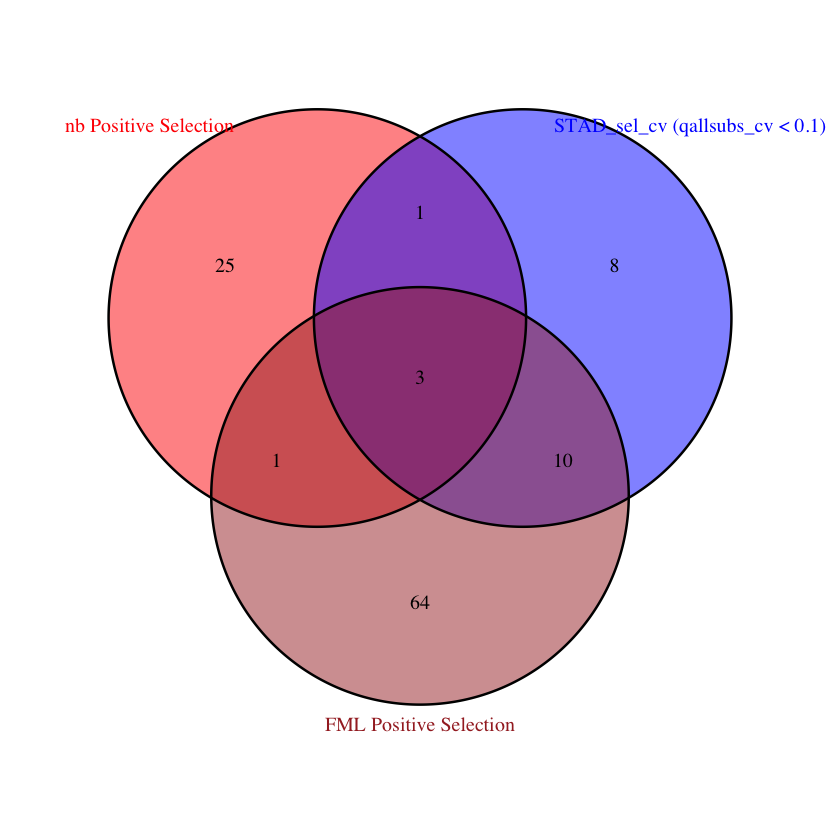

In [104]:
nb_sig_genes <- mutation_counts_filtered %>%
  filter(selection_status == "Positive" & adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

bi_dnds_positive_genes <- mutation_counts_filtered %>%
  filter(dnds_selection == "Positive" & dnds_adj_p_value < 0.05) %>%
  pull(Hugo_Symbol) %>%
  unique()

dndscv_significant_genes <- STAD_sel_cv %>%
  filter(qallsubs_cv < 0.05) %>%
  pull(gene_name) %>%
  unique()

FML_sig_genes <- FML %>%
  filter(q_phi_pos < 0.05) %>%
  pull(gene) %>%
  unique()

CLUSTL_sig <- CLUSTL %>%
  filter(adj_p_value < 0.05) %>%
  pull(SYMBOL) %>%
  unique()

fill_colors <- c("red", "blue", 'brown')

venn_plot <- venn.diagram(
  x = list(
    "nb Positive Selection" = nb_sig_genes,
    "STAD_sel_cv (qallsubs_cv < 0.1)" = dndscv_significant_genes,
    # "binomial dn/ds Positive Selection" = bi_dnds_positive_genes,
    "FML Positive Selection" = FML_sig_genes
    # "CLUSTL Clusters" = CLUSTL_sig
  ),
  filename = NULL, 
  fill = fill_colors,
  # alpha = 0.5,
  label.col = "black",
  # cex = 2, 
  # cat.cex = 1.5,
  cat.col = fill_colors,
  margin = 0.1
)
grid.draw(venn_plot)

In [105]:
nb_sig_genes <- unique(toupper(nb_sig_genes))
bi_dnds_positive_genes <- unique(toupper(bi_dnds_positive_genes))
dndscv_significant_genes <- unique(toupper(dndscv_significant_genes))
FML_sig_genes <- unique(toupper(FML_sig_genes))
CLUSTL_sig <- unique(toupper(CLUSTL_sig))

Reduce(intersect, list(nb_sig_genes,
                       # bi_dnds_positive_genes, 
                       dndscv_significant_genes, 
                       FML_sig_genes))


[1] "KRAS" "PGM5" "TP53"

In [106]:
colnames(mutation_counts_filtered)

[1] "Hugo_Symbol"                 "observed_mutations"         
 [3] "gene_length"                 "log_gene_length"            
 [5] "expected_mutations"          "avg_sift"                   
 [7] "dN_dS"                       "dN"                         
 [9] "dS"                          "syn_C>T"                    
[11] "syn_G>A"                     "syn_G>T"                    
[13] "syn_T>G"                     "syn_A>G"                    
[15] "syn_T>C"                     "syn_C>A"                    
[17] "syn_G>C"                     "syn_T>A"                    
[19] "syn_A>T"                     "syn_A>C"                    
[21] "syn_C>G"                     "expected_syn"               
[23] "p_value"                     "pos_adj_p_value"            
[25] "pos_selection"               "log_expected_mutations"     
[27] "expected_mutations_combined" "diff_obs_exp"               
[29] "ratio_obs_exp"               "adj_p_value"                
[31] "selection_status"            "expected_syn_predicted"     
[33] "expected_dN_predicted"       "adj_p_value_dN"             
[35] "p_value_dN"                  "predicted_dNdS"             
[37] "dndscv_selection"            "total_mutations"            
[39] "dN_frac"                     "expected_dN"                
[41] "dnds_p_value"                "dnds_adj_p_value"           
[43] "dnds_selection"

In [107]:
mutation_counts_filtered[(mutation_counts_filtered$p_value < 0.05) & (mutation_counts_filtered$Hugo_Symbol == "ARID1A"),]




Hugo_Symbol,observed_mutations,gene_length,log_gene_length,expected_mutations,avg_sift,dN_dS,dN,dS,syn_C>T,⋯,adj_p_value_dN,p_value_dN,predicted_dNdS,dndscv_selection,total_mutations,dN_frac,expected_dN,dnds_p_value,dnds_adj_p_value,dnds_selection
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
ARID1A,57,8595,9.058936,20.62652,0,17.99999,54,3,1,⋯,0.6517558,0.3064233,17.99999,Neutral,57,0.9473684,37,1.765999e-07,3.870422e-06,Positive
